<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-exploratory-data-analysis-of-the-top-1000-songs-through-5-years" data-toc-modified-id="Basic-exploratory-data-analysis-of-the-top-1000-songs-through-5-years-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic exploratory data analysis of the top 1000 songs through 5 years</a></span></li><li><span><a href="#K-means-with-Principal-component-analysis" data-toc-modified-id="K-means-with-Principal-component-analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>K means with Principal component analysis</a></span><ul class="toc-item"><li><span><a href="#Scree-Plot" data-toc-modified-id="Scree-Plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Scree Plot</a></span></li></ul></li><li><span><a href="#Clustering-with-K-Means" data-toc-modified-id="Clustering-with-K-Means-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clustering with K-Means</a></span><ul class="toc-item"><li><span><a href="#K-Means-Inertia" data-toc-modified-id="K-Means-Inertia-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>K-Means Inertia</a></span></li><li><span><a href="#An-Optimal-k" data-toc-modified-id="An-Optimal-k-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>An Optimal k</a></span></li><li><span><a href="#Silhouette-Diagram" data-toc-modified-id="Silhouette-Diagram-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Silhouette Diagram</a></span></li><li><span><a href="#Voronoi-Diagram-for-K=11" data-toc-modified-id="Voronoi-Diagram-for-K=11-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Voronoi Diagram for K=11</a></span></li><li><span><a href="#k-=-11-with-3-Principal-Components" data-toc-modified-id="k-=-11-with-3-Principal-Components-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>k = 11 with 3 Principal Components</a></span></li></ul></li><li><span><a href="#Cluster-Analysis" data-toc-modified-id="Cluster-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cluster Analysis</a></span></li></ul></div>

# Creating playlist on Spotify of similar songs through Spotipy: Spotify's API

December 2022

Spotify is a music streaming service that offers on-demand access to over 30 million songs, podcasts, and videos. It was founded in 2006 and is based in London. It has a user base of around 140 million monthly users, with 60 million of those being paying subscribers. The company uses AI and machine learning to improve the user experience and gather customer data insights. It has acquired several companies focused on AI and data analysis, including The Echo Nest, Seed Scientific, CrowdAlbum, Sonalytic, MightyTV, Mediachain, and Niland. Spotify employs about 1,400 people and has annual revenues of nearly $8 billion. It pays royalties to artists based on the number of times their songs are streamed by users.

# This Project 

Given this importance of AI in Spotify's business objectives, I have decided to explore one of the apps that I use daily. I extract the top 1000 songs from 2017 to 2022 through Spotipy: Spotify's Python API. Artists and songs are studied for key audio features that are presented by the API. I then use PCA to reduce the dimensiality and use K-means clustering to make playlist of similar songs based on their audio features.

To know more about the extraction process, you can visit this file: "LINK"

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-exploratory-data-analysis-of-the-top-1000-songs-through-5-years" data-toc-modified-id="Basic-exploratory-data-analysis-of-the-top-1000-songs-through-5-years-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic exploratory data analysis of the top 1000 songs through 5 years</a></span></li><li><span><a href="#Scree-Plot" data-toc-modified-id="Scree-Plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Scree Plot</a></span></li><li><span><a href="#K-Means-Inertia" data-toc-modified-id="K-Means-Inertia-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>K-Means Inertia</a></span></li><li><span><a href="#An-Optimal-k" data-toc-modified-id="An-Optimal-k-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>An Optimal k</a></span></li><li><span><a href="#Silhouette-Diagram" data-toc-modified-id="Silhouette-Diagram-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Silhouette Diagram</a></span></li><li><span><a href="#Voronoi-Diagram-for-K=11" data-toc-modified-id="Voronoi-Diagram-for-K=11-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Voronoi Diagram for K=11</a></span></li><li><span><a href="#k-=-11-with-3-Principal-Components" data-toc-modified-id="k-=-11-with-3-Principal-Components-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>k = 11 with 3 Principal Components</a></span></li><li><span><a href="#Cluster-Analysis" data-toc-modified-id="Cluster-Analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Cluster Analysis</a></span></li></ul></div>

In [1]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

## Import ML modules
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib as mpl
# allowing all the columns to be visualized
pd.options.display.max_columns = None

import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
from pylab import *
# rendering all graphics straight out of the notebook
%matplotlib inline

## Basic exploratory data analysis of the top 1000 songs through 5 years

In [2]:
spotify = pd.concat(
    map(pd.read_csv, ["spotify_data_2017.csv","spotify_data_2018.csv","spotify_data_2019.csv","spotify_data_2020.csv",
                      "spotify_data_2021.csv","spotify_data_2022.csv"]), ignore_index=True)
spotify

,Unnamed: 0,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Steve Lacy,Dark Red,3EaJDYHA0KnX88JvDhL9oa,89,0.603,0.784,6,-4.023,1,0.0620,0.4460,0.000008,0.1190,0.769,172.041,173104,4
1,1,Cigarettes After Sex,Apocalypse,3AVrVz5rK8Hrqo9YGiVGN5,84,0.369,0.467,5,-9.018,1,0.0274,0.0194,0.460000,0.1090,0.174,94.473,290147,4
2,2,XXXTENTACION,Revenge,5TXDeTFVRVY7Cvt0Dw4vWW,88,0.746,0.251,11,-16.169,0,0.2590,0.7820,0.002030,0.1060,0.180,139.999,120027,4
3,3,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,85,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4
4,4,Lil Baby,Freestyle,5BbdKBZO0TH0GhfxUfyhL9,83,0.877,0.517,2,-5.426,0,0.0706,0.2170,0.000000,0.1430,0.255,119.996,162053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5608,735,Daddy Yankee,Con Calma,1FR7jFyVy3DajNtFIW5IqW,0,0.737,0.860,8,-2.652,0,0.0594,0.1100,0.000002,0.0574,0.656,93.989,193227,4
5609,736,Daddy Yankee,Rompe,7t9e4MFj5MBL7HO8IFaQTR,0,0.687,0.806,1,-6.019,0,0.0549,0.0358,0.000006,0.0569,0.534,176.064,189040,4
5610,737,Daddy Yankee,Mil Problemas,0TEkrAkXDduxynkJFXMAYb,0,0.696,0.814,1,-5.025,1,0.1290,0.1160,0.000000,0.1330,0.788,88.940,154547,4
5611,738,Daddy Yankee,Que Tire Pa Lante,2LrIv7cyKFUeK75b1urO3s,0,0.659,0.901,7,-2.814,1,0.0358,0.0478,0.000000,0.1480,0.704,93.979,210520,4


In [3]:
spotify = spotify.drop(["Unnamed: 0"],axis=1)

In [4]:
spotify

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Steve Lacy,Dark Red,3EaJDYHA0KnX88JvDhL9oa,89,0.603,0.784,6,-4.023,1,0.0620,0.4460,0.000008,0.1190,0.769,172.041,173104,4
1,Cigarettes After Sex,Apocalypse,3AVrVz5rK8Hrqo9YGiVGN5,84,0.369,0.467,5,-9.018,1,0.0274,0.0194,0.460000,0.1090,0.174,94.473,290147,4
2,XXXTENTACION,Revenge,5TXDeTFVRVY7Cvt0Dw4vWW,88,0.746,0.251,11,-16.169,0,0.2590,0.7820,0.002030,0.1060,0.180,139.999,120027,4
3,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,85,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4
4,Lil Baby,Freestyle,5BbdKBZO0TH0GhfxUfyhL9,83,0.877,0.517,2,-5.426,0,0.0706,0.2170,0.000000,0.1430,0.255,119.996,162053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5608,Daddy Yankee,Con Calma,1FR7jFyVy3DajNtFIW5IqW,0,0.737,0.860,8,-2.652,0,0.0594,0.1100,0.000002,0.0574,0.656,93.989,193227,4
5609,Daddy Yankee,Rompe,7t9e4MFj5MBL7HO8IFaQTR,0,0.687,0.806,1,-6.019,0,0.0549,0.0358,0.000006,0.0569,0.534,176.064,189040,4
5610,Daddy Yankee,Mil Problemas,0TEkrAkXDduxynkJFXMAYb,0,0.696,0.814,1,-5.025,1,0.1290,0.1160,0.000000,0.1330,0.788,88.940,154547,4
5611,Daddy Yankee,Que Tire Pa Lante,2LrIv7cyKFUeK75b1urO3s,0,0.659,0.901,7,-2.814,1,0.0358,0.0478,0.000000,0.1480,0.704,93.979,210520,4


In [5]:
print(spotify.shape)

(5613, 17)


In [6]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5613 entries, 0 to 5612
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       5613 non-null   object 
 1   track_name        5613 non-null   object 
 2   track_id          5613 non-null   object 
 3   popularity        5613 non-null   int64  
 4   danceability      5613 non-null   float64
 5   energy            5613 non-null   float64
 6   key               5613 non-null   int64  
 7   loudness          5613 non-null   float64
 8   mode              5613 non-null   int64  
 9   speechiness       5613 non-null   float64
 10  acousticness      5613 non-null   float64
 11  instrumentalness  5613 non-null   float64
 12  liveness          5613 non-null   float64
 13  valence           5613 non-null   float64
 14  tempo             5613 non-null   float64
 15  duration_ms       5613 non-null   int64  
 16  time_signature    5613 non-null   int64  


In [7]:
# statistical distribution of the data
spotify.describe()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5613.000000,5613.00000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000,5613.000000
mean,69.752361,0.64804,0.584731,5.230893,-7.570711,0.638518,0.117313,0.292624,0.057311,0.174516,0.459587,121.413143,194228.731338,3.904864
std,12.023333,0.16154,0.198724,3.594830,4.164512,0.480473,0.116635,0.291539,0.197353,0.132851,0.230647,30.640442,52758.292052,0.442567
min,0.000000,0.00000,0.000020,0.000000,-40.449000,0.000000,0.000000,0.000000,0.000000,0.018700,0.000000,0.000000,39591.000000,0.000000
25%,66.000000,0.54800,0.463000,2.000000,-8.691000,0.000000,0.038300,0.046700,0.000000,0.099300,0.278000,96.990000,162680.000000,4.000000
50%,70.000000,0.66400,0.604000,5.000000,-6.638000,1.000000,0.062200,0.181000,0.000000,0.121000,0.449000,120.990000,193209.000000,4.000000
75%,75.000000,0.76500,0.727000,8.000000,-5.175000,1.000000,0.154000,0.474000,0.000242,0.201000,0.631000,142.933000,221173.000000,4.000000
max,100.000000,0.98400,1.000000,11.000000,1.060000,1.000000,0.868000,0.996000,1.000000,0.946000,0.980000,220.099000,646239.000000,5.000000


array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>],
       [<AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>],
       [<AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>],
       [<AxesSubplot: title={'center': 'duration_ms'}>,
        <AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

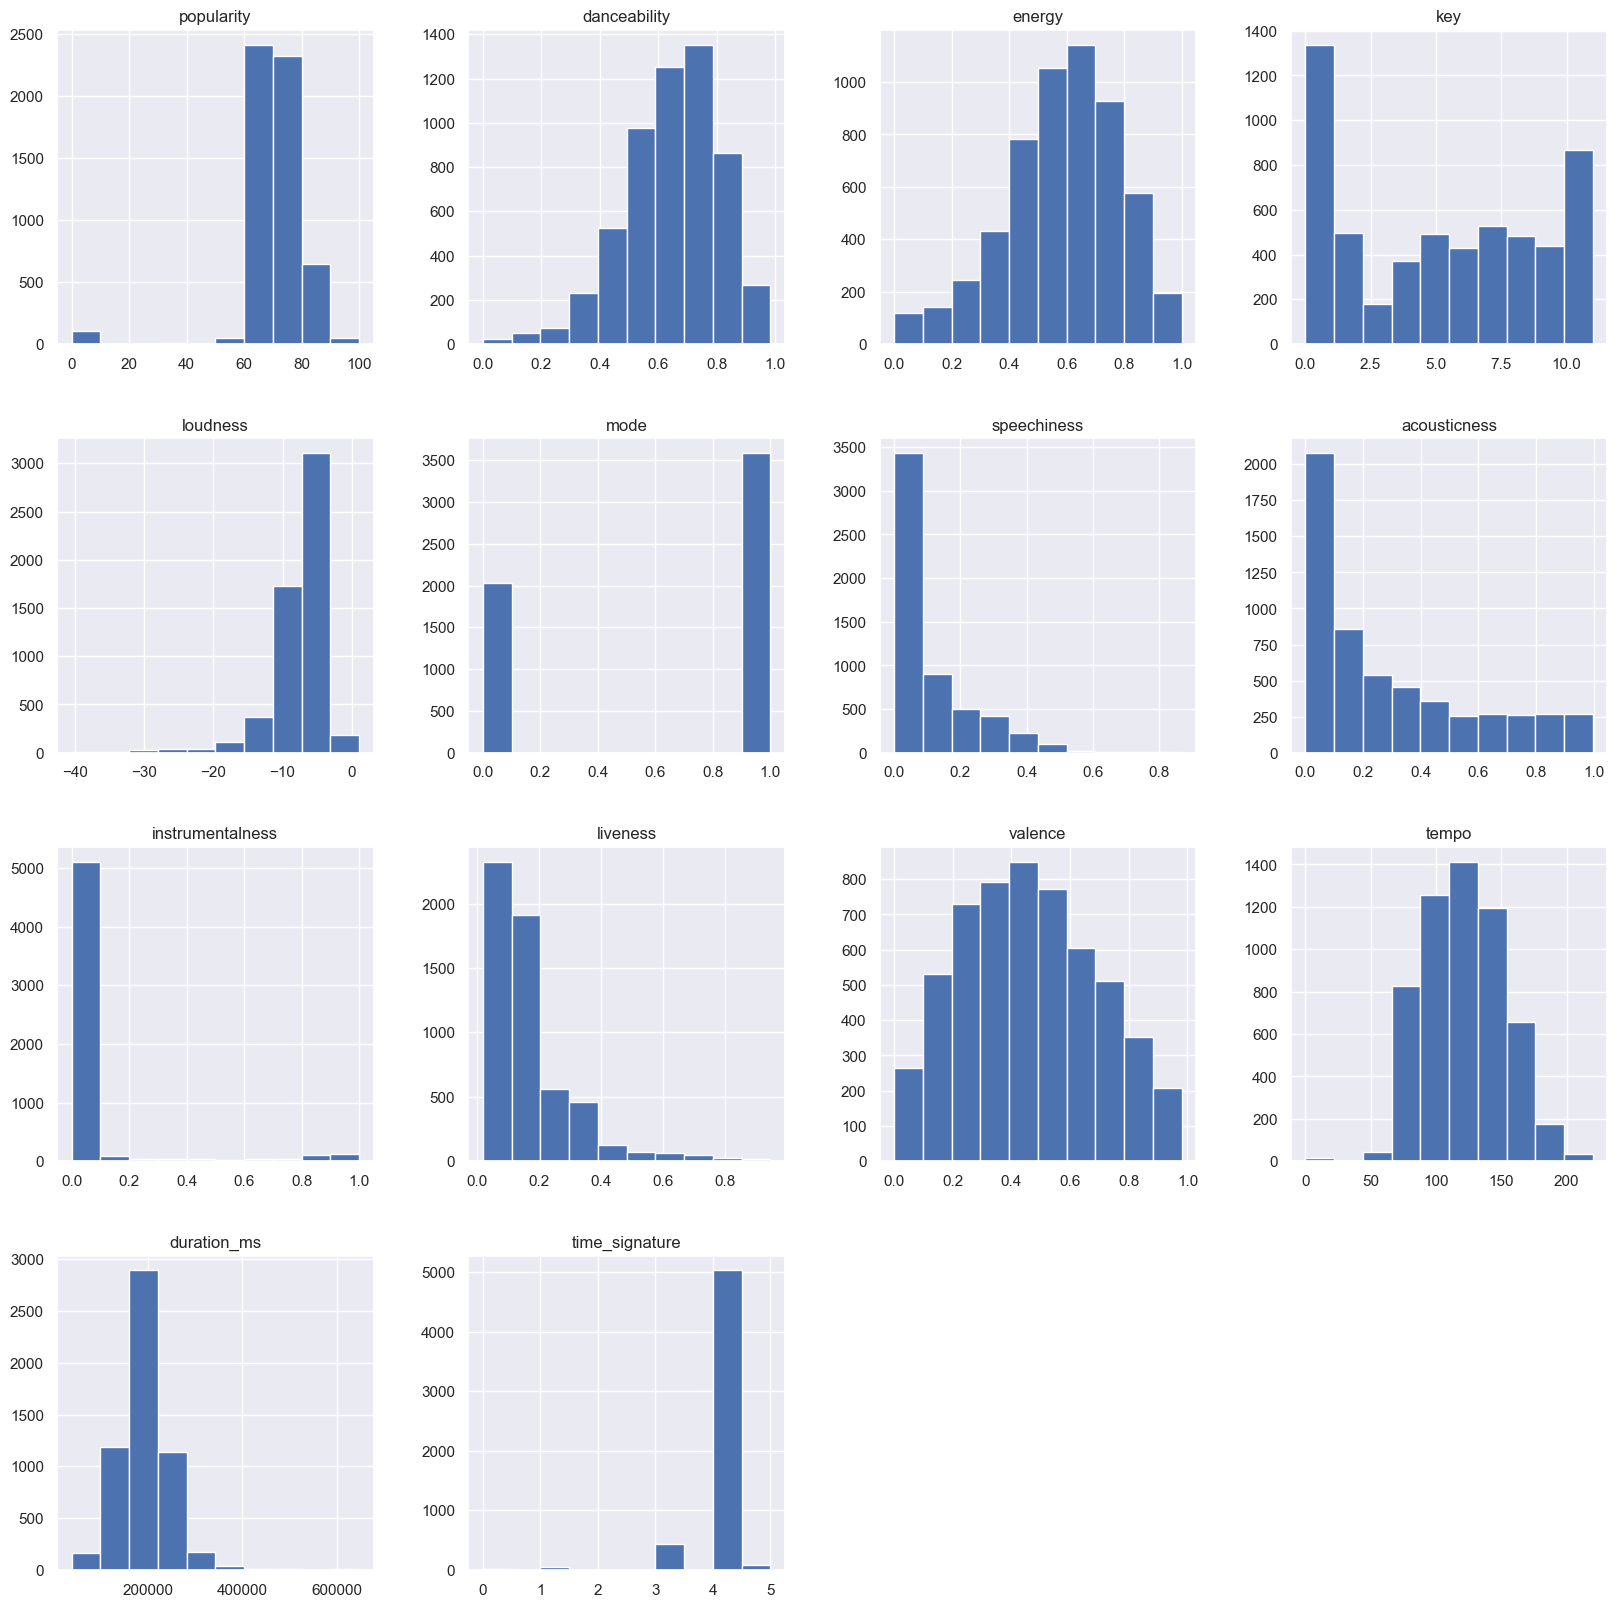

In [8]:
features = list(spotify.columns)
spotify[features].hist(figsize=(20, 20))

In [9]:
# unique values
print("\nUNIQUE VALUES:")
print(spotify.nunique().sort_values())


UNIQUE VALUES:
mode                   2
time_signature         5
key                   12
popularity            61
danceability         752
energy               951
liveness             988
valence             1069
speechiness         1146
artist_name         1753
instrumentalness    1915
acousticness        2021
loudness            4185
tempo               4997
duration_ms         5185
track_name          5304
track_id            5613
dtype: int64


In [10]:
spotify.describe(include=["object", "bool"])

,artist_name,track_name,track_id
count,5613,5613,5613
unique,1753,5304,5613
top,Taylor Swift,Ghost,3EaJDYHA0KnX88JvDhL9oa
freq,118,5,1


In [11]:
print("Top 20 artists from 2017-2022")
spotify["artist_name"].value_counts()[:20]

Top 20 artists from 2017-2022


Taylor Swift                  118
Drake                          75
Juice WRLD                     70
Bad Bunny                      69
Billie Eilish                  56
$uicideboy$                    47
Morgan Wallen                  45
SZA                            45
Lil Baby                       43
XXXTENTACION                   41
YoungBoy Never Broke Again     39
Playboi Carti                  39
A Boogie Wit da Hoodie         38
The Weeknd                     37
Metro Boomin                   37
Post Malone                    37
Tyler, The Creator             37
Harry Styles                   35
Pentatonix                     33
Zach Bryan                     33
Name: artist_name, dtype: int64

In [12]:
print("Top 30 songs with over 90 popularity from 2017-2022")
most = spotify.query('popularity > 90', inplace = False).sort_values('popularity', ascending = False)
most[:30]

Top 30 songs with over 90 popularity from 2017-2022


,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
4875,Sam Smith,Unholy (feat. Kim Petras),3nqQXoyQOWXiESFLlDF1hG,100,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,156943,4
4928,Manuel Turizo,La Bachata,5ww2BF9slyYgNOk37BlC4u,98,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,162638,4
4898,David Guetta,I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,97,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,175238,4
4876,Taylor Swift,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,97,0.637,0.643,4,-6.571,1,0.0519,0.13000,0.000002,0.1420,0.533,97.008,200690,4
4962,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2tTmW7RDtMQtBk7m2rYeSw,97,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,198938,4
4888,Bad Bunny,Me Porto Bonito,6Sq7ltF9Qa7SNFBsV5Cogx,96,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,178567,4
4873,Drake,Rich Flex,1bDbXMyjaUIooNwFE9wn0N,96,0.561,0.520,11,-9.342,0,0.2440,0.05030,0.000002,0.3550,0.424,153.150,239360,3
1980,Chris Brown,Under The Influence,5IgjP7X4th6nMNDh4akUHb,95,0.733,0.690,9,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,184613,4
4908,Meghan Trainor,Made You Look,0QHEIqNKsMoOY5urbzN48u,95,0.838,0.525,10,-3.562,1,0.0665,0.34500,0.000002,0.0771,0.884,144.981,134256,4
4885,Bad Bunny,Tití Me Preguntó,1IHWl5LamUGEuP4ozKQSXZ,95,0.650,0.715,5,-5.198,0,0.2530,0.09930,0.000291,0.1260,0.187,106.672,243717,4


In [13]:
spotify1 = spotify[spotify["popularity"]>75]
spotify1

# df= df[df["popularity"] > 60]

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Steve Lacy,Dark Red,3EaJDYHA0KnX88JvDhL9oa,89,0.603,0.784,6,-4.023,1,0.0620,0.4460,0.000008,0.1190,0.769,172.041,173104,4
1,Cigarettes After Sex,Apocalypse,3AVrVz5rK8Hrqo9YGiVGN5,84,0.369,0.467,5,-9.018,1,0.0274,0.0194,0.460000,0.1090,0.174,94.473,290147,4
2,XXXTENTACION,Revenge,5TXDeTFVRVY7Cvt0Dw4vWW,88,0.746,0.251,11,-16.169,0,0.2590,0.7820,0.002030,0.1060,0.180,139.999,120027,4
3,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,85,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4
4,Lil Baby,Freestyle,5BbdKBZO0TH0GhfxUfyhL9,83,0.877,0.517,2,-5.426,0,0.0706,0.2170,0.000000,0.1430,0.255,119.996,162053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,Junior H,Loco Enamorado,0V6NB0qBW7Vvm7RuSoHszG,77,0.569,0.380,11,-7.231,0,0.0920,0.0887,0.000000,0.1600,0.481,77.556,226000,1
5598,MEDUZA,Bad Memories (feat. Elley Duhé & FAST BOY),3rb0tMq42WfggucPm0HHkA,87,0.607,0.767,5,-6.069,0,0.0474,0.1180,0.000000,0.1220,0.662,123.998,148629,3
5599,Disco Lines,Baby Girl,2cSdAkzAf2T4j4aLvx4LLz,79,0.730,0.907,2,-3.720,1,0.0606,0.0921,0.114000,0.2300,0.249,120.968,111074,4
5601,Eden Muñoz,Como Quieras Quiero,7MyOq9tWhL9bGHeeG5Iz5p,79,0.555,0.707,10,-7.665,1,0.1200,0.6440,0.000011,0.1010,0.963,185.914,122097,3


In [14]:
# creating a correlation matrix
corr = spotify1.corr()

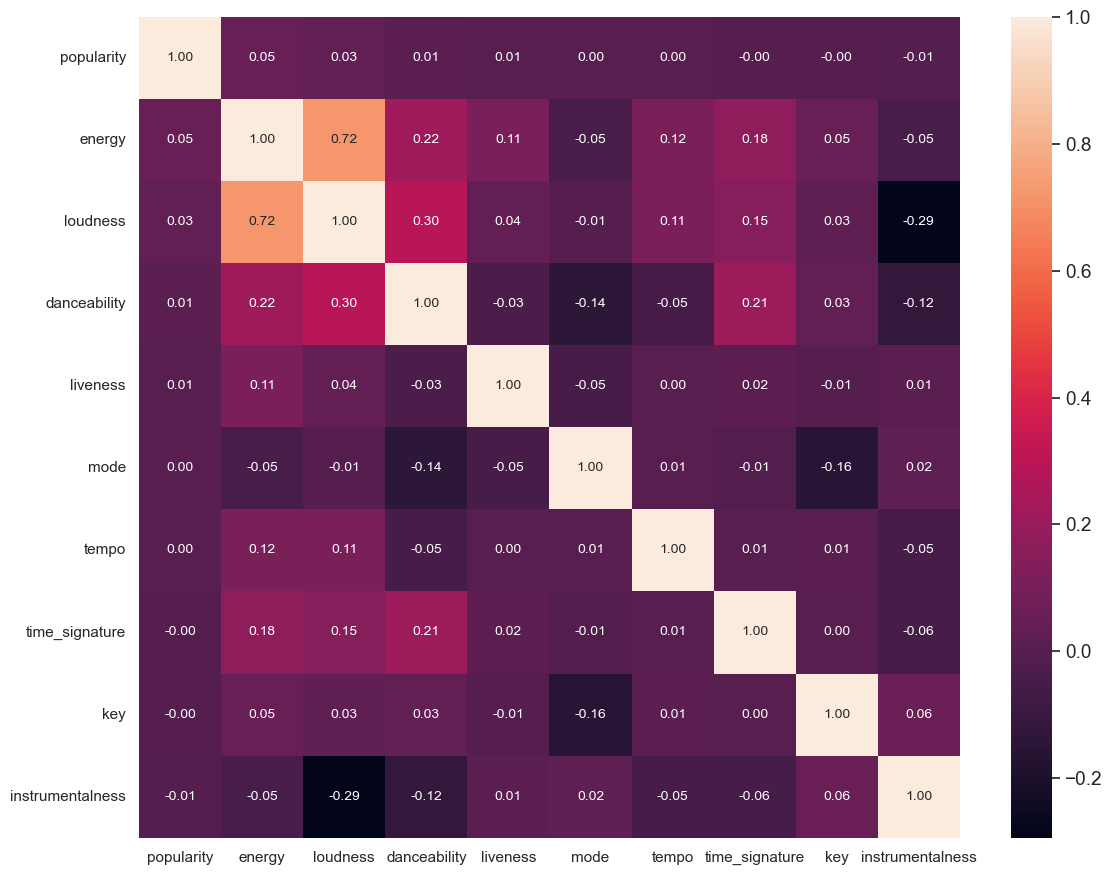

In [15]:
# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(spotify1[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

## K means with Principal component analysis

Principal component analysis (PCA) is a statistical method for reducing the number of dimensions (features) in a dataset by combining the input variables in a specific way and retaining the most important ones while dropping the least important. It is often used when the number of dimensions is too high to be visualized, as is the case with 10 audio features in this example. By reducing the dimensions to 3 or possibly 4, it becomes possible to visualize groupings and clusters in the data and draw meaningful conclusions. In this case, PCA will be used in combination with unsupervised machine learning techniques to analyze and group songs in a monthly playlist based on their audio features.

In [16]:
spotify_k_means = spotify1.copy()

In [17]:
spotify_k_means

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Steve Lacy,Dark Red,3EaJDYHA0KnX88JvDhL9oa,89,0.603,0.784,6,-4.023,1,0.0620,0.4460,0.000008,0.1190,0.769,172.041,173104,4
1,Cigarettes After Sex,Apocalypse,3AVrVz5rK8Hrqo9YGiVGN5,84,0.369,0.467,5,-9.018,1,0.0274,0.0194,0.460000,0.1090,0.174,94.473,290147,4
2,XXXTENTACION,Revenge,5TXDeTFVRVY7Cvt0Dw4vWW,88,0.746,0.251,11,-16.169,0,0.2590,0.7820,0.002030,0.1060,0.180,139.999,120027,4
3,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,85,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4
4,Lil Baby,Freestyle,5BbdKBZO0TH0GhfxUfyhL9,83,0.877,0.517,2,-5.426,0,0.0706,0.2170,0.000000,0.1430,0.255,119.996,162053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,Junior H,Loco Enamorado,0V6NB0qBW7Vvm7RuSoHszG,77,0.569,0.380,11,-7.231,0,0.0920,0.0887,0.000000,0.1600,0.481,77.556,226000,1
5598,MEDUZA,Bad Memories (feat. Elley Duhé & FAST BOY),3rb0tMq42WfggucPm0HHkA,87,0.607,0.767,5,-6.069,0,0.0474,0.1180,0.000000,0.1220,0.662,123.998,148629,3
5599,Disco Lines,Baby Girl,2cSdAkzAf2T4j4aLvx4LLz,79,0.730,0.907,2,-3.720,1,0.0606,0.0921,0.114000,0.2300,0.249,120.968,111074,4
5601,Eden Muñoz,Como Quieras Quiero,7MyOq9tWhL9bGHeeG5Iz5p,79,0.555,0.707,10,-7.665,1,0.1200,0.6440,0.000011,0.1010,0.963,185.914,122097,3


In [18]:
audio_features = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo']

In [19]:
## Scale features for analysis
features = audio_features + ['track_name', 'artist_name']
spotify_k_means[audio_features]
spotify_k_means[features]

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_name,artist_name
0,0.603,0.784,6,-4.023,0.0620,0.4460,0.000008,0.1190,0.769,172.041,Dark Red,Steve Lacy
1,0.369,0.467,5,-9.018,0.0274,0.0194,0.460000,0.1090,0.174,94.473,Apocalypse,Cigarettes After Sex
2,0.746,0.251,11,-16.169,0.2590,0.7820,0.002030,0.1060,0.180,139.999,Revenge,XXXTENTACION
3,0.558,0.559,6,-9.222,0.0959,0.3710,0.000007,0.1090,0.620,78.558,See You Again (feat. Kali Uchis),"Tyler, The Creator"
4,0.877,0.517,2,-5.426,0.0706,0.2170,0.000000,0.1430,0.255,119.996,Freestyle,Lil Baby
...,...,...,...,...,...,...,...,...,...,...,...,...
5591,0.569,0.380,11,-7.231,0.0920,0.0887,0.000000,0.1600,0.481,77.556,Loco Enamorado,Junior H
5598,0.607,0.767,5,-6.069,0.0474,0.1180,0.000000,0.1220,0.662,123.998,Bad Memories (feat. Elley Duhé & FAST BOY),MEDUZA
5599,0.730,0.907,2,-3.720,0.0606,0.0921,0.114000,0.2300,0.249,120.968,Baby Girl,Disco Lines
5601,0.555,0.707,10,-7.665,0.1200,0.6440,0.000011,0.1010,0.963,185.914,Como Quieras Quiero,Eden Muñoz


In [20]:
X = spotify_k_means[audio_features]

min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [21]:
## Initial PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled)

pca1_var = round(pca.explained_variance_ratio_[0] * 100, 2)
pca2_var = round(pca.explained_variance_ratio_[1] * 100, 2)

print(f'{pca1_var} % of the datasets variance lies along the first principal component (PC).')
print(f'{pca2_var} % of the datasets variance lies along the second principal component (PC).')
print(f'{100 - (pca1_var + pca2_var)} % of the datasets variance lies on the remaining PCs')

28.33 % of the datasets variance lies along the first principal component (PC).
25.94 % of the datasets variance lies along the second principal component (PC).
45.730000000000004 % of the datasets variance lies on the remaining PCs


### Scree Plot
It is more straightforward to select the number of dimensions to reduce to using PCA by choosing the number that cumulatively contribute a significant portion of the variance. A scree plot is a graphical representation of the eigenvalues of factors or principal components in an analysis. It is used to decide how many factors to retain in an exploratory factor analysis or which principal components to keep in a principal component analysis.

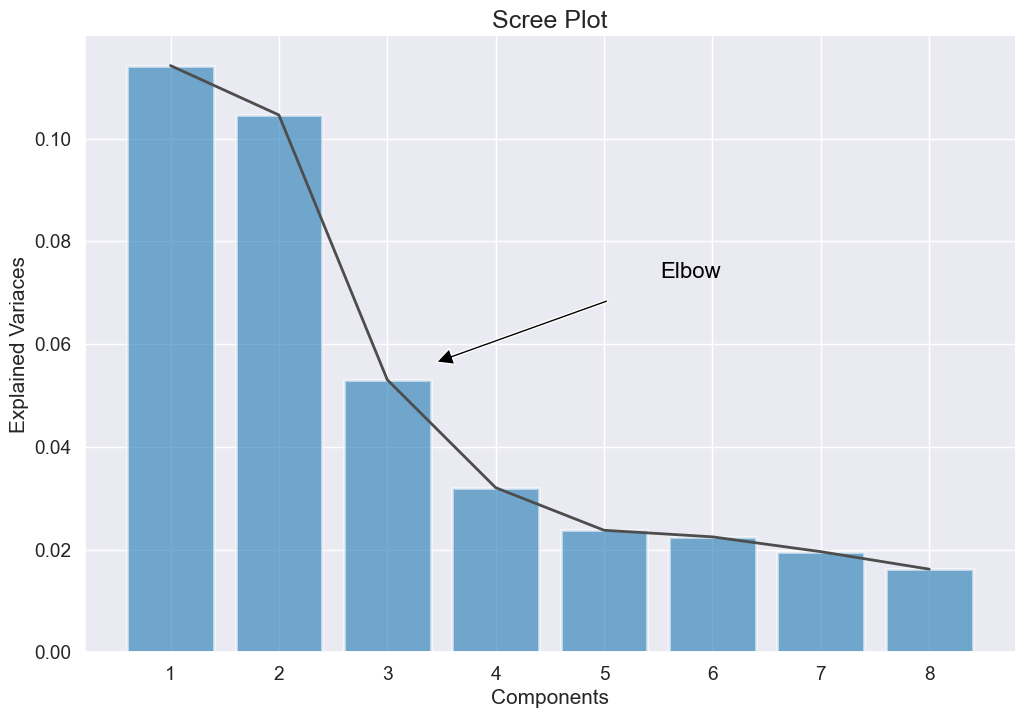

In [22]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_scaled)

## Plotting
plt.figure(figsize = (12, 8))
plt.plot(pca.explained_variance_, linewidth = 2, color = '#4d4d4d')
plt.bar(list(range(0, 8)), pca.explained_variance_, linewidth = 2, color = '#1f78b4', alpha = 0.6)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.annotate(
    'Elbow', xy = (2, pca.explained_variance_[2]), xytext = (0.55, 0.55), textcoords = 'figure fraction', \
    fontsize = 16, color = 'black',
    arrowprops = dict(facecolor = 'black', shrink = 0.18, width = 2)
             )
plt.title('Scree Plot', size = 18)
plt.xticks(list(range(0, 8)), list(range(1, 9)))
plt.show()

I will explore the possible clustering and transformation with 3 PCA components, where the elbow is most prominent and is able to explain a larger amount of variance. 3 principal components also allows for 3Dimensional visualisations which are fun and interesting to work with.

In [23]:
## 3 PC
pca_3 = PCA(n_components = 3)
X_pca_3 = pca_3.fit_transform(X_scaled)

In [24]:
## PCA 3 DF
data_pca_3_df = pd.DataFrame(data = X_pca_3, columns = ['principal_component_1', 
                                                        'principal_component_2', 'principal_component_3'])
data_pca_3_df.tail()

,principal_component_1,principal_component_2,principal_component_3
1377,-0.346358,0.352412,-0.146657
1378,-0.173653,-0.201555,0.083468
1379,0.065339,-0.385509,-0.237205
1380,-0.315268,0.358751,0.545666
1381,-0.476532,0.263340,0.038858


In [25]:
## Expalined variance ratio
print(f'Explained variance per principal component: {pca_3.explained_variance_ratio_}')

Explained variance per principal component: [0.28328934 0.25943487 0.13159129]


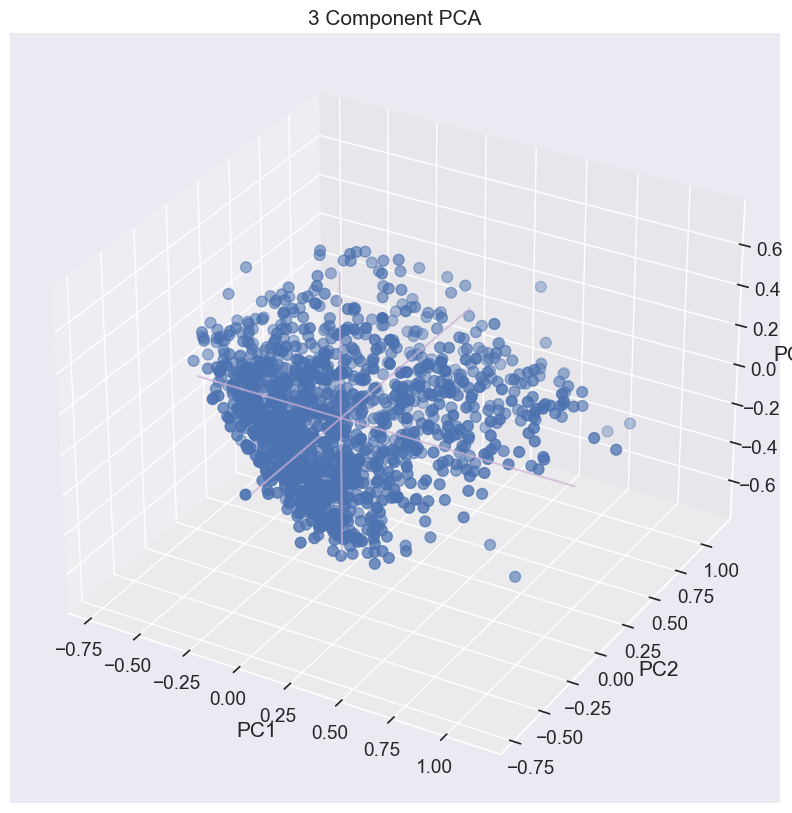

In [26]:
from matplotlib.colors import ListedColormap
#my_cmap = ListedColormap(sns.color_palette(colors).as_hex())


fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_pca_3_df['principal_component_1'], data_pca_3_df['principal_component_2'], 
           data_pca_3_df['principal_component_3'], s = 60)

# make simple, bare axis lines through space:
xAxisLine = ((min(data_pca_3_df['principal_component_1']), max(data_pca_3_df['principal_component_1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], '#cab2d6', alpha = 0.7)
yAxisLine = ((0, 0), (min(data_pca_3_df['principal_component_2']), max(data_pca_3_df['principal_component_2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], '#cab2d6', alpha = 0.7)
zAxisLine = ((0, 0), (0,0), (min(data_pca_3_df['principal_component_3']), max(data_pca_3_df['principal_component_3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], '#cab2d6', alpha = 0.7)

# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3 Component PCA")

plt.show()

## Clustering with K-Means
K-Means clustering is a technique used to identify subgroups within a dataset, where data points within the same subgroup (cluster) are similar to each other and data points in different clusters are very different. It is an unsupervised learning method, meaning that we don't have pre-defined labels for the data and are only trying to investigate the structure of the data by dividing it into clusters. The K-Means algorithm is an iterative process that tries to partition the data into a specified number of distinct, non-overlapping clusters. It works by first randomly selecting a number of data points as initial centroids, then iteratively reassigning data points to the cluster with the closest centroid and recalculating the centroids based on the data points in each cluster. This process is repeated until the centroids no longer change or move. The K-Means algorithm follows an approach called Expectation-Maximization, where the "E-step" is assigning data points to clusters and the "M-step" is calculating the new centroids for each cluster.

In [27]:
## Import and load KMeans
from sklearn.cluster import KMeans
k = 3

pca_2 = PCA(n_components = 2)
X_pca_2 = pca_2.fit_transform(X_scaled)


kmeans = KMeans(n_clusters = k, random_state = 42)
clusters = kmeans.fit_predict(X_pca_2)

In [28]:
print(f'The algorithm found the following 3 centroids')
kmeans.cluster_centers_

The algorithm found the following 3 centroids


array([[ 0.10577475, -0.31733361],
       [-0.30484801,  0.1228891 ],
       [ 0.39968282,  0.33276645]])

In [29]:
print(f'With a K values of {k} the models intertia is {kmeans.inertia_}')

With a K values of 3 the models intertia is 103.47388282395974


### K-Means Inertia
The K-Means algorithm is used to group data samples into clusters of equal variance by minimizing the inertia, which is a measure of the coherence of the clusters. The algorithm works by choosing centroids that minimize the inertia. However, the inertia has some limitations as a metric. It assumes that clusters are convex and isotropic, and it may not work well for clusters with irregular shapes. Additionally, the inertia is not normalized, so it is difficult to compare values between different datasets. In high-dimensional spaces, the Euclidean distances used in the inertia calculation can become inflated, which is known as the "curse of dimensionality." To address these issues, it may be helpful to use dimensionality reduction techniques like PCA before applying K-Means. It is also important to note that the value of k (the number of clusters) that minimizes the inertia may not be the best choice, as the inertia will generally decrease as the number of clusters increases. It can be helpful to plot the inertia as a function of k and analyze the curve to determine the appropriate number of clusters.

We cannot simply take the value of k that minimizes the inertia, since it keeps getting lower as we increase k. Indeed, the more clusters there are, the closer each instance will be to its closest centroid, and therefore the lower the inertia will be. However, we can plot the inertia as a function of k and analyze the resulting curve:

In [30]:
## Inertias for varying K's
kmeans_per_k = [KMeans(n_clusters = k, random_state = 42).fit(X_pca_2) for k in range(1, 40)]
inertias = [model.inertia_ for model in kmeans_per_k]

k = 1
for inertia in inertias:
    print(f'With a K values of {k} the models intertia is {inertia}')
    k += 1

With a K values of 1 the models intertia is 302.2349208961756
With a K values of 2 the models intertia is 184.92797786593232
With a K values of 3 the models intertia is 103.47388282395974
With a K values of 4 the models intertia is 79.5064853232323
With a K values of 5 the models intertia is 63.967790696107826
With a K values of 6 the models intertia is 53.266629939355475
With a K values of 7 the models intertia is 45.18995281649048
With a K values of 8 the models intertia is 39.66239471425385
With a K values of 9 the models intertia is 35.08138198166434
With a K values of 10 the models intertia is 31.640188183411425
With a K values of 11 the models intertia is 28.336497140168685
With a K values of 12 the models intertia is 25.868429804172674
With a K values of 13 the models intertia is 23.897697342985037
With a K values of 14 the models intertia is 22.35408973286539
With a K values of 15 the models intertia is 20.657357032974886
With a K values of 16 the models intertia is 19.78547770

/var/folders/69/yq7zz3n12pbgn3pfb3cs6j7m0000gn/T/ipykernel_69617/2223787515.py:3: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.



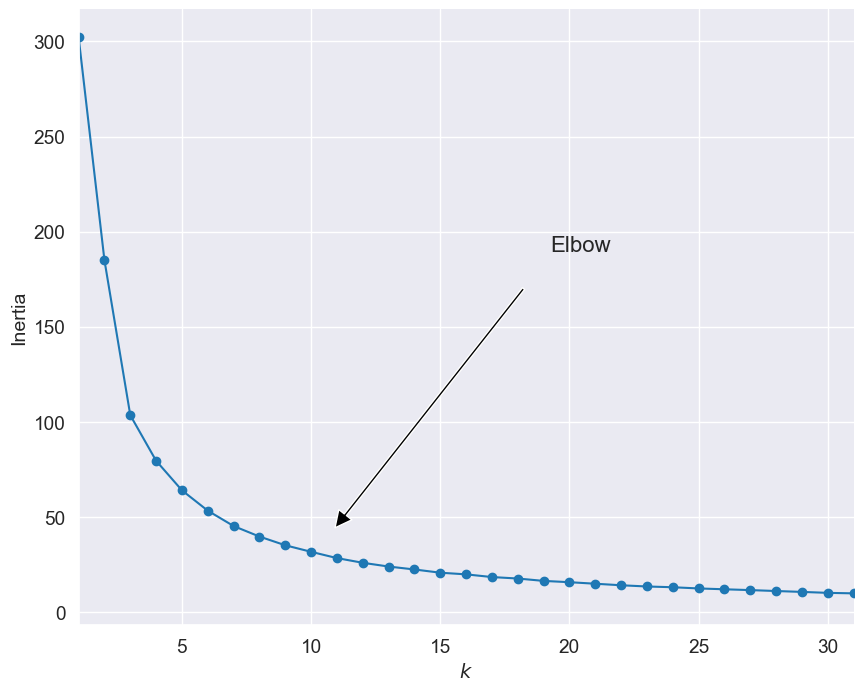

In [31]:
## Plotting
plt.figure(figsize = (10, 8))
plt.plot(range(1, 40), inertias, "bo-", color = '#1f78b4')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate(
    'Elbow', xy = (10, inertias[10]), xytext = (0.55, 0.55), textcoords = 'figure fraction', fontsize = 16,
    arrowprops = dict(facecolor = 'black', shrink = 0.1, width = 2)
             )
plt.xlim([1, 31])
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.show()

As can be seen, there is an elbow at k=11 or so, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So k=11 is a pretty good choice. Of course in this example it is not perfect since it most likely means that two or more blobs will be considered as just a single cluster, but it's a pretty good clustering nonetheless. Other techniques will be used to further validate our value for k below. It is also worth noting that I am dealing with a dataset woth over a 1K tracks so having a higher value of K would be intuitive.

In [32]:
## Function used to plot data, centroids and decision boundries (HOML)
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, ax=ax):
    mins = X.min(axis=0) - 1
    maxs = X.max(axis=0) + 1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

### An Optimal k
"the optimal choice of $k$ will strike a balance between maximum compression of the data using a single cluster, and 
maximum accuracy by assigning each data point to its own cluster."

Another approach is to look at the silhouette score, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to (b−a)/max(a,b) where a is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and b is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes b, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

Let's plot the silhouette score as a function of k:

In [33]:
## Silhouette score
from sklearn.metrics import silhouette_score

print(silhouette_score(X_pca_3, kmeans.labels_))

silhouette_scores = [silhouette_score(X_pca_3, model.labels_)
                     for model in kmeans_per_k[1:23]]

0.34358899592060654


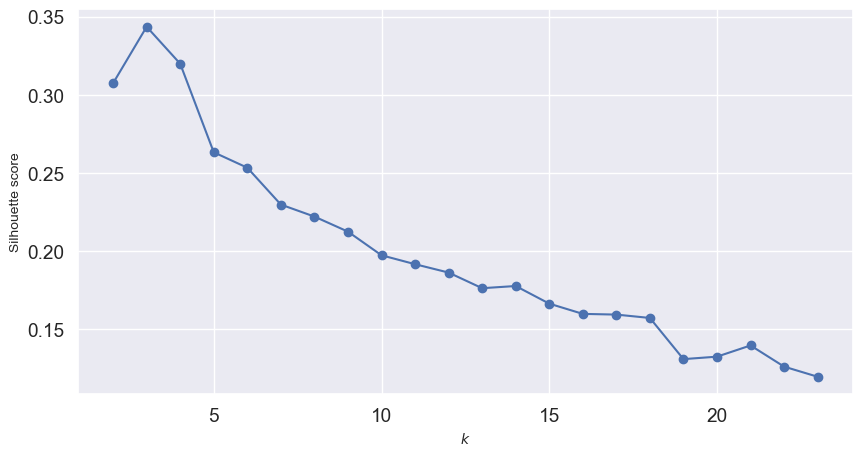

In [34]:
## Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 24), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=10)
plt.ylabel("Silhouette score", fontsize=10)
#save_fig("silhouette_score_vs_k_diagram")
plt.show()

The silloutte diagram shows a different story though. Here the elbow is at k = 11. 

### Silhouette Diagram
An even more informative visualisation is obtained when each instances silhouette coefficient is plotted, sorted by the cluster the instance is assigned to and by the value of the coefficient. This is called a silhouette diagram. Each diagram contains one knife shape per cluster. The shape's height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (the wider the better). The dashed lines indicates the mean silhouette coefficient

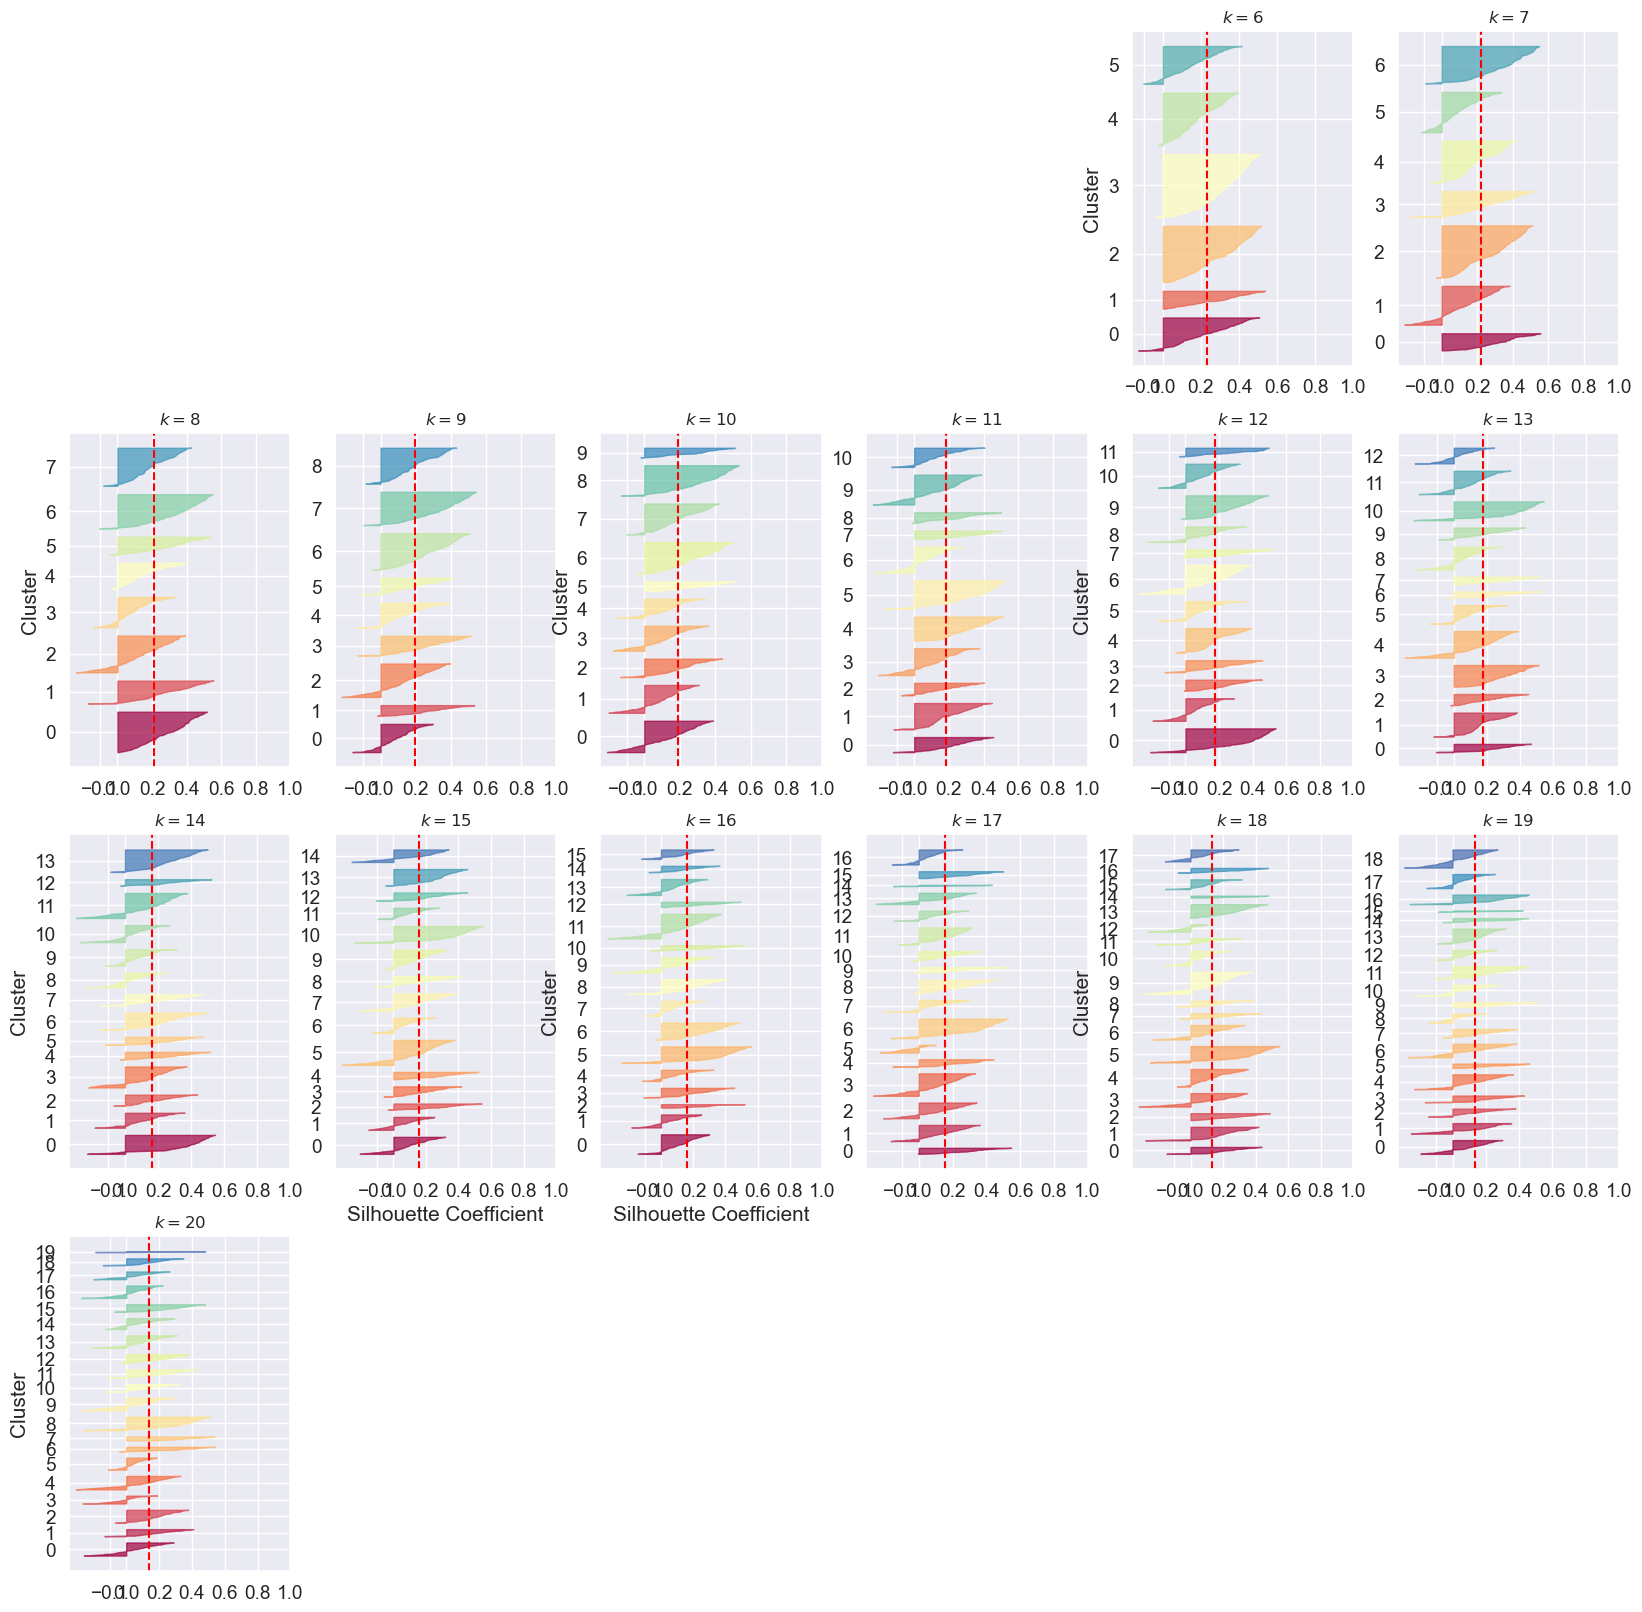

In [35]:
## Plotting the Sillhouette Diagram
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(20, 20))

for k in (6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20):
    plt.subplot(4, 6, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_pca_3, y_pred)

    padding = len(X_pca_3) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4, 6, 8,10,12,14,16,18,20):
        plt.ylabel("Cluster")
    
    if k in (6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    else:
        plt.tick_params(labelbottom=False)

    if k in (15, 16):
        plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=12)

#save_fig("silhouette_analysis_diagram")
plt.show()

I think I am going with k = 11.

In [36]:
## K = 11 with 2 PCs
kmeans = KMeans(n_clusters = 11, random_state = 42)
clusters = kmeans.fit_predict(X_pca_2)

### Voronoi Diagram for K=11
A Voronoi diagram is a partition of a plane into regions close to each of a given set of objects. In the simplest case, these objects are just finitely many points in the plane. For each seed there is a corresponding region consisting of all points of the plane closer to that seed than to any other. This makes it well suited to plot the centroids, data points and decision boundaries for the K-Means model.

This section below will show the and find the clusters for the tracks in my playlist based on the audio features that have been transformed into 2 principal components. A following section will take this analysis a step further.

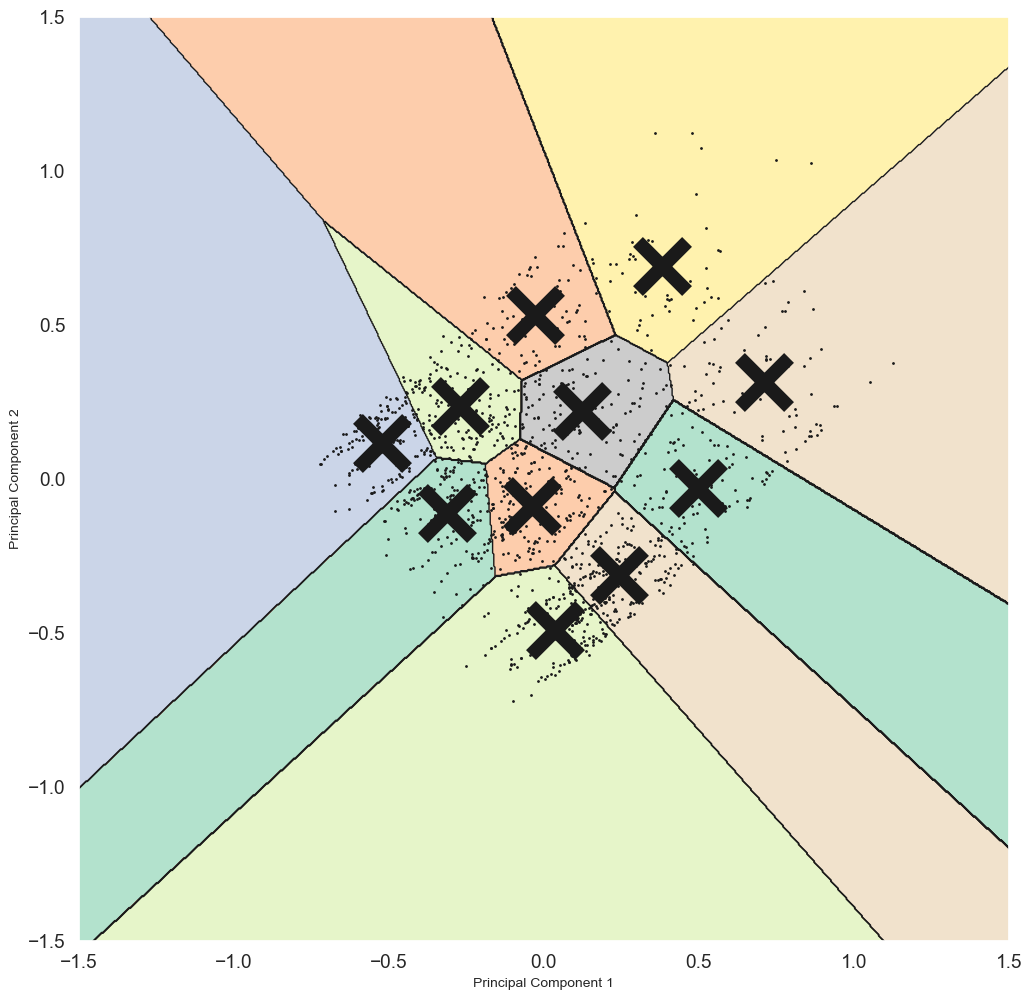

In [37]:
## Plotting Voronoi
plt.figure(figsize = (12, 12))
plot_decision_boundaries(kmeans, X_pca_2)

plt.xlabel('Principal Component 1', size = 10)
plt.ylabel('Principal Component 2', rotation = 90,  size = 10)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.show()

Because clustering is a unsupervised machine learning technique, we don't have the value to what these clusters truly mean. The model is able to separate and form sub-groups of the data but it is up to the user to interpret the results and try to find a viable relationship that link instances in one cluster to other instances in the same cluster. This can be an extremely challenging task depending on the data that is being studied at hand, the amount of features considered and various statistical measures of the data.

This section below creates a way to form a data frame that joins the song and artist name with the respective cluster it was assigned to. It also joins all the values of the audio features studied so that we can begin to try to understand why songs were assigned to their cluster and not others.

In [38]:
## Create dataframe with cluster labels
cluster_map = pd.DataFrame()
cluster_map['data_index'] = spotify_k_means[features].index.values
cluster_map['cluster'] = kmeans.labels_

In [39]:
cluster_label_df = pd.concat([spotify_k_means[features], cluster_map['cluster']], axis = 1)

In [40]:
def ClusterIndicesNumpy(clustNum, labels_array): #numpy 
    return np.where(labels_array == clustNum)[0]

In [41]:
## Index of all datapoints in cluster 2
ClusterIndicesNumpy(0, kmeans.labels_)

array([  16,   31,   47,   60,   85,   92,  120,  139,  144,  155,  163,
        179,  186,  189,  206,  212,  222,  225,  237,  239,  278,  296,
        333,  360,  373,  374,  375,  401,  409,  428,  432,  459,  502,
        518,  526,  530,  534,  543,  558,  632,  637,  645,  646,  663,
        676,  698,  720,  725,  743,  747,  751,  775,  812,  830,  847,
        852,  856,  862,  865,  886,  959,  968,  969,  973,  991,  992,
        999, 1006, 1010, 1021, 1030, 1067, 1073, 1098, 1126, 1187, 1195,
       1202, 1222, 1225, 1241, 1250, 1253, 1256, 1259, 1310, 1312, 1340,
       1351, 1358, 1364, 1372])

### k = 11 with 3 Principal Components

The songs have been grouped into 18 different clusters using the K-Means algorithm. This next section will run the same K-Means, k = 18, model but this time the model will utilise a third PCA component. The centroids, data and decision boundaries will be visualised in an interactive 3D space.

In [42]:
## Creating plot labels and pca_transformation
pca = PCA(n_components = 3)
pca.fit(X_scaled)

X_pca_3 = pca.transform(X_scaled)

df_pca = pd.DataFrame(X_pca_3)

In [43]:
kmeans = KMeans(n_clusters = 11, random_state = 42)
clusters = kmeans.fit_predict(X_pca_3)

In [44]:
## Create dataframe with cluster labels
cluster_map = pd.DataFrame()
cluster_map['data_index'] = spotify_k_means[features].index.values
cluster_map['cluster'] = kmeans.labels_

cluster_label_3d_df = pd.concat([df_pca, cluster_map['cluster']], axis = 1)

In [45]:
cluster_label_3d_df

,0,1,2,cluster
0,-0.140127,-0.009070,0.334784,5
1,0.131958,0.037107,-0.472201,7
2,0.132407,0.830611,-0.040454,4
3,0.004685,0.100713,0.159498,5
4,0.239940,-0.219898,-0.137847,9
...,...,...,...,...
1377,-0.346358,0.352412,-0.146657,2
1378,-0.173653,-0.201555,0.083468,0
1379,0.065339,-0.385509,-0.237205,9
1380,-0.315268,0.358751,0.545666,5


In [46]:
text1 = spotify_k_means['track_name'] + ' - ' + spotify_k_means['artist_name']
text2 = text1.values

In [47]:
song_name_df = pd.DataFrame(text2)

cluster_label_3d_df  = pd.concat([cluster_label_3d_df, song_name_df], axis = 1)
cluster_label_3d_df.columns = ['0', '1', '2', 'cluster', 'name']
cluster_label_3d_df

,0,1,2,cluster,name
0,-0.140127,-0.009070,0.334784,5,Dark Red - Steve Lacy
1,0.131958,0.037107,-0.472201,7,Apocalypse - Cigarettes After Sex
2,0.132407,0.830611,-0.040454,4,Revenge - XXXTENTACION
3,0.004685,0.100713,0.159498,5,"See You Again (feat. Kali Uchis) - Tyler, The ..."
4,0.239940,-0.219898,-0.137847,9,Freestyle - Lil Baby
...,...,...,...,...,...
1377,-0.346358,0.352412,-0.146657,2,Loco Enamorado - Junior H
1378,-0.173653,-0.201555,0.083468,0,Bad Memories (feat. Elley Duhé & FAST BOY) - M...
1379,0.065339,-0.385509,-0.237205,9,Baby Girl - Disco Lines
1380,-0.315268,0.358751,0.545666,5,Como Quieras Quiero - Eden Muñoz


In [48]:
## Visualising cluster shapes in 3D
cluster1 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 0]
cluster2 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 1]
cluster3 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 2]
cluster4 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 3]
cluster5 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 4]
cluster6 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 5]
cluster7 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 6]
cluster8 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 7]
cluster9 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 8]
cluster10 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 9]
cluster11 = cluster_label_3d_df.loc[cluster_label_3d_df['cluster'] == 10]


## Scatters
scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2], \
    text = cluster1.values[:,4],
    marker = dict( size=2, color='#a6cee3')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2], \
    text = cluster2.values[:,4],
    marker = dict( size=2, color='#1f78b4')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2], \
    text = cluster3.values[:,4],
    marker = dict( size=2, color='#b2df8a')
)
scatter4 = dict(
    mode = "markers",
    name = "Cluster 4",
    type = "scatter3d",    
    x = cluster4.values[:,0], y = cluster4.values[:,1], z = cluster4.values[:,2], \
    text = cluster4.values[:,4],
    marker = dict( size=2, color='#33a02c')
)
scatter5 = dict(
    mode = "markers",
    name = "Cluster 5",
    type = "scatter3d",    
    x = cluster5.values[:,0], y = cluster5.values[:,1], z = cluster5.values[:,2], \
    text = cluster5.values[:,4],
    marker = dict( size=2, color='#fb9a99')
)
scatter6 = dict(
    mode = "markers",
    name = "Cluster 6",
    type = "scatter3d",    
    x = cluster6.values[:,0], y = cluster6.values[:,1], z = cluster6.values[:,2], \
    text = cluster6.values[:,4],
    marker = dict( size=2, color='#e31a1c')
)     
scatter7 = dict(
    mode = "markers",
    name = "Cluster 7",
    type = "scatter3d",    
    x = cluster7.values[:,0], y = cluster7.values[:,1], z = cluster7.values[:,2], \
    text = cluster7.values[:,4],
    marker = dict( size=2, color='#fdbf6f')
)
scatter8 = dict(
    mode = "markers",
    name = "Cluster 8",
    type = "scatter3d",    
    x = cluster8.values[:,0], y = cluster8.values[:,1], z = cluster8.values[:,2], \
    text = cluster8.values[:,4],
    marker = dict( size=2, color='#ff7f00')
)
scatter9 = dict(
    mode = "markers",
    name = "Cluster 9",
    type = "scatter3d",    
    x = cluster9.values[:,0], y = cluster9.values[:,1], z = cluster9.values[:,2], \
    text = cluster9.values[:,4],
    marker = dict( size=2, color='#0A75AD')
)     
scatter10 = dict(
    mode = "markers",
    name = "Cluster 10",
    type = "scatter3d",    
    x = cluster10.values[:,0], y = cluster10.values[:,1], z = cluster10.values[:,2], \
    text = cluster10.values[:,4],
    marker = dict( size=2, color='#4c1130')
)
scatter11 = dict(
    mode = "markers",
    name = "Cluster 11",
    type = "scatter3d",    
    x = cluster11.values[:,0], y = cluster11.values[:,1], z = cluster11.values[:,2], \
    text = cluster11.values[:,4],
    marker = dict( size=2, color='#4c1130')
)
 
## Clusters 
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2], \
    text = cluster1.values[:,4],
    color='#a6cee3', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2], \
    text = cluster2.values[:,4],
    color='#1f78b4', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2], \
    text = cluster3.values[:,4],
    color='#b2df8a', showscale = True
)
cluster4 = dict(
    alphahull = 5,
    name = "Cluster 4",
    opacity = .1,
    type = "mesh3d",    
    x = cluster4.values[:,0], y = cluster4.values[:,1], z = cluster4.values[:,2], \
    text = cluster4.values[:,4],
    color='#33a02c', showscale = True
)
cluster5 = dict(
    alphahull = 5,
    name = "Cluster 5",
    opacity = .1,
    type = "mesh3d",    
    x = cluster5.values[:,0], y = cluster5.values[:,1], z = cluster5.values[:,2], \
    text = cluster5.values[:,4],
    color='#fb9a99', showscale = True
)
cluster6 = dict(
    alphahull = 5,
    name = "Cluster 6",
    opacity = .1,
    type = "mesh3d",    
    x = cluster6.values[:,0], y = cluster6.values[:,1], z = cluster6.values[:,2], \
    text = cluster6.values[:,4],
    color='#e31a1c', showscale = True
)
cluster7 = dict(
    alphahull = 5,
    name = "Cluster 7",
    opacity = .1,
    type = "mesh3d",    
    x = cluster7.values[:,0], y = cluster7.values[:,1], z = cluster7.values[:,2], \
    text = cluster7.values[:,4],
    color='#fdbf6f', showscale = True
)
cluster8 = dict(
    alphahull = 5,
    name = "Cluster 8",
    opacity = .1,
    type = "mesh3d",    
    x = cluster8.values[:,0], y = cluster8.values[:,1], z = cluster8.values[:,2], \
    text = cluster8.values[:,4],
    color='#ff7f00', showscale = True
)

cluster9 = dict(
    alphahull = 5,
    name = "Cluster 9",
    opacity = .1,
    type = "mesh3d",    
    x = cluster9.values[:,0], y = cluster9.values[:,1], z = cluster9.values[:,2], \
    text = cluster9.values[:,4],
    color='#0A75AD', showscale = True
)

cluster10 = dict(
    alphahull = 5,
    name = "Cluster 10",
    opacity = .1,
    type = "mesh3d",    
    x = cluster10.values[:,0], y = cluster10.values[:,1], z = cluster10.values[:,2], \
    text = cluster10.values[:,4],
    color='#bfff00', showscale = True
)

cluster11 = dict(
    alphahull = 5,
    name = "Cluster 11",
    opacity = .1,
    type = "mesh3d",    
    x = cluster11.values[:,0], y = cluster11.values[:,1], z = cluster11.values[:,2], \
    text = cluster11.values[:,4],
    color='#4c1130', showscale = True
)

layout = dict(
    title = 'Interactive Track Clusters in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True),
        zaxis = dict( zeroline=True),
    ),
    autosize = False,
    width = 800,
    height = 800,
    margin = dict(
        l = 50,
        r = 50,
        b = 50,
        t = 50,
        pad = 4
    ),
    template = "plotly_white" 
)
fig = dict( data=[scatter1, scatter2, scatter3, scatter4, scatter5, scatter6, scatter7, scatter8, scatter9, scatter10, scatter11, \
                  cluster1, cluster2, cluster3, cluster4, cluster5, cluster6, cluster7, cluster8,cluster9, cluster10, cluster11], layout = layout)


# Use py.iplot() for IPython notebook
py.iplot(fig, filename='mesh3d_sample')


# fig = go.Figure(data = [trace])

## Cluster Analysis

Now I will try to create a final dataframe with clusters and the track names and artists for me to make the 14 playlists

In [49]:
spotify2 = spotify1.reset_index()
spotify2

,index,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Steve Lacy,Dark Red,3EaJDYHA0KnX88JvDhL9oa,89,0.603,0.784,6,-4.023,1,0.0620,0.4460,0.000008,0.1190,0.769,172.041,173104,4
1,1,Cigarettes After Sex,Apocalypse,3AVrVz5rK8Hrqo9YGiVGN5,84,0.369,0.467,5,-9.018,1,0.0274,0.0194,0.460000,0.1090,0.174,94.473,290147,4
2,2,XXXTENTACION,Revenge,5TXDeTFVRVY7Cvt0Dw4vWW,88,0.746,0.251,11,-16.169,0,0.2590,0.7820,0.002030,0.1060,0.180,139.999,120027,4
3,3,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,85,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4
4,4,Lil Baby,Freestyle,5BbdKBZO0TH0GhfxUfyhL9,83,0.877,0.517,2,-5.426,0,0.0706,0.2170,0.000000,0.1430,0.255,119.996,162053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,5591,Junior H,Loco Enamorado,0V6NB0qBW7Vvm7RuSoHszG,77,0.569,0.380,11,-7.231,0,0.0920,0.0887,0.000000,0.1600,0.481,77.556,226000,1
1378,5598,MEDUZA,Bad Memories (feat. Elley Duhé & FAST BOY),3rb0tMq42WfggucPm0HHkA,87,0.607,0.767,5,-6.069,0,0.0474,0.1180,0.000000,0.1220,0.662,123.998,148629,3
1379,5599,Disco Lines,Baby Girl,2cSdAkzAf2T4j4aLvx4LLz,79,0.730,0.907,2,-3.720,1,0.0606,0.0921,0.114000,0.2300,0.249,120.968,111074,4
1380,5601,Eden Muñoz,Como Quieras Quiero,7MyOq9tWhL9bGHeeG5Iz5p,79,0.555,0.707,10,-7.665,1,0.1200,0.6440,0.000011,0.1010,0.963,185.914,122097,3


In [50]:
spotify2 = spotify2.drop(["index"],axis=1)

In [51]:
spotify2

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Steve Lacy,Dark Red,3EaJDYHA0KnX88JvDhL9oa,89,0.603,0.784,6,-4.023,1,0.0620,0.4460,0.000008,0.1190,0.769,172.041,173104,4
1,Cigarettes After Sex,Apocalypse,3AVrVz5rK8Hrqo9YGiVGN5,84,0.369,0.467,5,-9.018,1,0.0274,0.0194,0.460000,0.1090,0.174,94.473,290147,4
2,XXXTENTACION,Revenge,5TXDeTFVRVY7Cvt0Dw4vWW,88,0.746,0.251,11,-16.169,0,0.2590,0.7820,0.002030,0.1060,0.180,139.999,120027,4
3,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,85,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4
4,Lil Baby,Freestyle,5BbdKBZO0TH0GhfxUfyhL9,83,0.877,0.517,2,-5.426,0,0.0706,0.2170,0.000000,0.1430,0.255,119.996,162053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,Junior H,Loco Enamorado,0V6NB0qBW7Vvm7RuSoHszG,77,0.569,0.380,11,-7.231,0,0.0920,0.0887,0.000000,0.1600,0.481,77.556,226000,1
1378,MEDUZA,Bad Memories (feat. Elley Duhé & FAST BOY),3rb0tMq42WfggucPm0HHkA,87,0.607,0.767,5,-6.069,0,0.0474,0.1180,0.000000,0.1220,0.662,123.998,148629,3
1379,Disco Lines,Baby Girl,2cSdAkzAf2T4j4aLvx4LLz,79,0.730,0.907,2,-3.720,1,0.0606,0.0921,0.114000,0.2300,0.249,120.968,111074,4
1380,Eden Muñoz,Como Quieras Quiero,7MyOq9tWhL9bGHeeG5Iz5p,79,0.555,0.707,10,-7.665,1,0.1200,0.6440,0.000011,0.1010,0.963,185.914,122097,3


In [52]:
## Create DF
cluster_analysis_df = pd.concat([cluster_label_3d_df.drop('name', axis = 1), 
                                 spotify2, ], axis = 1)
cluster_analysis_df.drop(['0', '1', '2'], axis = 1, inplace = True)
cluster_analysis_df

,cluster,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,5,Steve Lacy,Dark Red,3EaJDYHA0KnX88JvDhL9oa,89,0.603,0.784,6,-4.023,1,0.0620,0.4460,0.000008,0.1190,0.769,172.041,173104,4
1,7,Cigarettes After Sex,Apocalypse,3AVrVz5rK8Hrqo9YGiVGN5,84,0.369,0.467,5,-9.018,1,0.0274,0.0194,0.460000,0.1090,0.174,94.473,290147,4
2,4,XXXTENTACION,Revenge,5TXDeTFVRVY7Cvt0Dw4vWW,88,0.746,0.251,11,-16.169,0,0.2590,0.7820,0.002030,0.1060,0.180,139.999,120027,4
3,5,"Tyler, The Creator",See You Again (feat. Kali Uchis),7KA4W4McWYRpgf0fWsJZWB,85,0.558,0.559,6,-9.222,1,0.0959,0.3710,0.000007,0.1090,0.620,78.558,180387,4
4,9,Lil Baby,Freestyle,5BbdKBZO0TH0GhfxUfyhL9,83,0.877,0.517,2,-5.426,0,0.0706,0.2170,0.000000,0.1430,0.255,119.996,162053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,2,Junior H,Loco Enamorado,0V6NB0qBW7Vvm7RuSoHszG,77,0.569,0.380,11,-7.231,0,0.0920,0.0887,0.000000,0.1600,0.481,77.556,226000,1
1378,0,MEDUZA,Bad Memories (feat. Elley Duhé & FAST BOY),3rb0tMq42WfggucPm0HHkA,87,0.607,0.767,5,-6.069,0,0.0474,0.1180,0.000000,0.1220,0.662,123.998,148629,3
1379,9,Disco Lines,Baby Girl,2cSdAkzAf2T4j4aLvx4LLz,79,0.730,0.907,2,-3.720,1,0.0606,0.0921,0.114000,0.2300,0.249,120.968,111074,4
1380,5,Eden Muñoz,Como Quieras Quiero,7MyOq9tWhL9bGHeeG5Iz5p,79,0.555,0.707,10,-7.665,1,0.1200,0.6440,0.000011,0.1010,0.963,185.914,122097,3


In [53]:
# popularity mean by cluster
cluster_analysis_df.groupby(['cluster']).popularity.mean().sort_values(ascending=False)

cluster
7     80.985185
10    80.760000
4     80.755102
0     80.733333
3     80.658228
1     80.620690
9     80.529101
2     80.500000
6     80.496774
8     80.081395
5     80.009901
Name: popularity, dtype: float64

I actually did not think I would get such uniform mean for popularity throughout the clusters. Well I guess I was kinda right in picking k = 11.

In [54]:
# checking number of songs in each cluster
cluster_analysis_df['cluster'].value_counts()

9     189
3     158
6     155
2     152
0     150
7     135
5     101
10    100
4      98
8      86
1      58
Name: cluster, dtype: int64

In [55]:
# statistical distribution of the data in each column, for each cluster
cluster_analysis_df.groupby("cluster").describe() 

popularity                                                        \
             count       mean       std   min    25%   50%    75%    max   
cluster                                                                    
0            150.0  80.733333  4.223086  76.0  77.00  80.0  83.00   97.0   
1             58.0  80.620690  4.171026  76.0  77.00  79.0  84.00   90.0   
2            152.0  80.500000  4.184487  76.0  77.00  80.0  82.25   96.0   
3            158.0  80.658228  4.365137  76.0  77.00  79.0  83.00   97.0   
4             98.0  80.755102  4.005309  76.0  78.00  80.0  83.00   94.0   
5            101.0  80.009901  4.097548  76.0  77.00  79.0  82.00   98.0   
6            155.0  80.496774  4.063416  76.0  77.00  79.0  83.00   94.0   
7            135.0  80.985185  4.329671  76.0  78.00  80.0  83.00   97.0   
8             86.0  80.081395  3.659685  76.0  77.00  79.0  82.00   90.0   
9            189.0  80.529101  4.372965  76.0  77.00  80.0  83.00  100.0   
10           100.0  80.760000  4.030490  76.0  77.75  80.0  83.25   92.0   

        danceability                                                        \
               count      mean       std     min      25%     50%      75%   
cluster                                                                      
0              150.0  0.719353  0.109974  0.3900  0.65225  0.7250  0.78550   
1               58.0  0.454707  0.159233  0.0000  0.37925  0.4465  0.54325   
2              152.0  0.653158  0.166141  0.2160  0.55300  0.6565  0.79200   
3              158.0  0.722759  0.111547  0.4330  0.64850  0.7350  0.80250   
4               98.0  0.609204  0.145804  0.3060  0.52625  0.6100  0.72600   
5              101.0  0.705337  0.119793  0.4090  0.61400  0.7150  0.80500   
6              155.0  0.729561  0.113166  0.4000  0.67600  0.7370  0.80650   
7              135.0  0.619193  0.138752  0.3160  0.52350  0.6210  0.72200   
8               86.0  0.508634  0.140584  0.0555  0.42825  0.5085  0.60400   
9              189.0  0.649222  0.134789  0.3060  0.55200  0.6620  0.74600   
10             100.0  0.665320  0.128727  0.3640  0.58375  0.6765  0.75600   

               energy                                                         \
           max  count      mean       std      min      25%     50%      75%   
cluster                                                                        
0        0.963  150.0  0.706113  0.115012  0.34600  0.62725  0.7150  0.77075   
1        0.817   58.0  0.251954  0.126352  0.00342  0.18000  0.2505  0.33500   
2        0.970  152.0  0.638447  0.150470  0.31000  0.53700  0.6320  0.72925   
3        0.950  158.0  0.737835  0.124839  0.43100  0.67000  0.7600  0.82450   
4        0.905   98.0  0.486663  0.135666  0.13600  0.38825  0.4845  0.57325   
5        0.963  101.0  0.610644  0.124744  0.20400  0.52900  0.6100  0.68900   
6        0.935  155.0  0.750271  0.110669  0.48200  0.68350  0.7660  0.82400   
7        0.912  135.0  0.584215  0.131012  0.27700  0.49250  0.5730  0.66350   
8        0.830   86.0  0.325912  0.124321  0.00481  0.24150  0.3415  0.40675   
9        0.935  189.0  0.625873  0.124576  0.34700  0.53700  0.6130  0.71700   
10       0.917  100.0  0.513040  0.120817  0.17800  0.43675  0.5110  0.59275   

                  key                                                  \
           max  count      mean       std  min  25%   50%   75%   max   
cluster                                                                 
0        0.935  150.0  5.633333  1.025950  4.0  5.0   6.0   7.0   7.0   
1        0.551   58.0  6.982759  1.905591  3.0  6.0   7.0   9.0  11.0   
2        0.989  152.0  9.671053  1.183643  7.0  9.0  10.0  11.0  11.0   
3        0.969  158.0  1.031646  0.884552  0.0  0.0   1.0   2.0   3.0   
4        0.974   98.0  8.887755  1.598212  6.0  8.0   9.0  10.0  11.0   
5        0.905  101.0  7.930693  1.582766  4.0  7.0   8.0   9.0  11.0   
6        0.999  155.0  9.548387  1.157660  7.0  8.5  10.0  11.0  11.0   

In [56]:
cluster_analysis_df = cluster_analysis_df[['track_id', 'track_name', 'artist_name', 'cluster']]
cluster_analysis_df.tail()

,track_id,track_name,artist_name,cluster
1377,0V6NB0qBW7Vvm7RuSoHszG,Loco Enamorado,Junior H,2
1378,3rb0tMq42WfggucPm0HHkA,Bad Memories (feat. Elley Duhé & FAST BOY),MEDUZA,0
1379,2cSdAkzAf2T4j4aLvx4LLz,Baby Girl,Disco Lines,9
1380,7MyOq9tWhL9bGHeeG5Iz5p,Como Quieras Quiero,Eden Muñoz,5
1381,0oBtwScT4B4BR5kZitNWd5,Punto G,Quevedo,6


In [57]:
cluster_analysis_df.groupby('cluster').apply(display)

,track_id,track_name,artist_name,cluster
30,1mMLMZYXkMueg65jRRWG1l,When It Rains It Pours,Luke Combs,0
44,52okn5MNA47tk87PeZJLEL,Let You Down,NF,0
46,2pg2TiYo9Rb8KeB5JjP7jS,Sativa,Jhené Aiko,0
59,4sNG6zQBmtq7M8aeeKJRMQ,Brazil,Declan McKenna,0
73,3B54sVLJ402zGa6Xm4YGNe,Unforgettable,French Montana,0
...,...,...,...,...
1357,1QpwvWMQGdOgA8MXXfgs4H,DICE,NMIXX,0
1361,7mFj0LlWtEJaEigguaWqYh,Sweetest Pie,Megan Thee Stallion,0
1365,0wGbyS1tExQSwOYu6UceyE,SHADOW,ONIMXRU,0
1371,0U1W2LZVUX7qTm7dDpqxh6,When You're Gone,Shawn Mendes,0


,track_id,track_name,artist_name,cluster
18,2bRKxuH1o7pTmb1y4GfdEc,Clean White Noise - Loopable with no fade,White Noise Baby Sleep,1
41,04sN26COy28wTXYj3dMoiZ,Bored,Billie Eilish,1
61,1RMJOxR6GRPsBHL8qeC2ux,Best Part (feat. H.E.R.),Daniel Caesar,1
71,41zXlQxzTi6cGAjpOXyLYH,idontwannabeyouanymore,Billie Eilish,1
90,1F6IbA7di42uPc3cff8PXV,Flaming Hot Cheetos,Clairo,1
116,5kRPPEWFJIMox5qIkQkiz5,Sweet Creature,Harry Styles,1
140,6MiVIH3fQlmz44jGx2DXn4,Love Is a Bitch,Two Feet,1
146,4VuS959DSpr82t3qBqCrWG,Supermarket Flowers,Ed Sheeran,1
168,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),Billie Eilish,1
216,0baNzeUcPQnQSagpe8T0mD,worldstar money (interlude),Joji,1


,track_id,track_name,artist_name,cluster
6,7sO5G9EABYOXQKNPNiE9NR,Ric Flair Drip (with Metro Boomin),Offset,2
8,1R0a2iXumgCiFb7HEZ7gUE,Don’t Blame Me,Taylor Swift,2
13,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,Lil Uzi Vert,2
25,69UqtTHfUKAJweQwEStRzC,Sunsetz,Cigarettes After Sex,2
27,5mCPDVBb16L4XQwDdbRUpz,Passionfruit,Drake,2
...,...,...,...,...
1327,32FhTAAjKZaBein150o3Px,because i liked a boy,Sabrina Carpenter,2
1335,28GCbKgjlVD9eDmasGbe0T,Me Fui de Vacaciones,Bad Bunny,2
1336,4pV6Kx1T9L49PBFwH1g8ca,Aces,dkj,2
1367,7mLWNwcvwRdEviz6SfYp8A,GigaChad Theme - Phonk House Version,g3ox_em,2


,track_id,track_name,artist_name,cluster
24,2OQ6a4CfUeYskpTTgyawyJ,You Make It Feel Like Christmas (feat. Blake S...,Gwen Stefani,3
77,5bgwqaRSS3M8WHWruHgSL5,8TEEN,Khalid,3
104,0l0CvurVUrr2w3Jj1hOVFc,NO,Meghan Trainor,3
108,63bmZnBN1CiJ9sA4qTEe8y,Adiós Amor,Christian Nodal,3
118,6QgjcU0zLnzq5OrUoSZ3OK,Feel It Still,Portugal. The Man,3
...,...,...,...,...
1348,0xzI1KAr0Yd9tv8jlIk3sn,Bad Decisions (with BTS & Snoop Dogg),benny blanco,3
1355,5YbPxJwPfrj7uswNwoF1pJ,Last Last,Burna Boy,3
1363,46FdwGMcgz6gik4RCpWBAW,Los Collares,Oscar Maydon,3
1366,4zrKN5Sv8JS5mqnbVcsul7,Celestial,Ed Sheeran,3


,track_id,track_name,artist_name,cluster
2,5TXDeTFVRVY7Cvt0Dw4vWW,Revenge,XXXTENTACION,4
26,0HZk0QsXPhMNAWNDR3rYE8,Hallelujah,Pentatonix,4
57,6gU9OKjOE7ghfEd55oRO57,The Weekend,SZA,4
62,4cxMGhkinTocPSVVKWIw0d,Losin Control,Russ,4
75,0qvzXomUDJVaUboy2wMfiS,This Town,Niall Horan,4
...,...,...,...,...
1280,1c39AwcrkN9srI7Az5662I,NIGHT RIDER,Joji,4
1323,3EMp20j5E42MxfFbsEsIvD,Churchill Downs (feat. Drake),Jack Harlow,4
1349,4YF13O2n16dcTyGgVmiGvN,Llorar y Llorar - con Carin Leon,Mau y Ricky,4
1359,5fqusHbZRDZrLikLiFwWTq,Gilded Lily - Sped Up,Cults,4


,track_id,track_name,artist_name,cluster
0,3EaJDYHA0KnX88JvDhL9oa,Dark Red,Steve Lacy,5
3,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"Tyler, The Creator",5
9,2tgQaL85WoRfgEa4hFQgrE,Feathered Indians,Tyler Childers,5
17,3GVkPk8mqxz0itaAriG1L7,Everybody Dies In Their Nightmares,XXXTENTACION,5
19,1f5cbQtDrykjarZVrShaDI,Drowning (feat. Kodak Black),A Boogie Wit da Hoodie,5
...,...,...,...,...
1354,5gZOpqxK3J5b5BSjzG1PkM,Vamos Aclarando Muchas Cosas - En Vivo,Codiciado,5
1360,1ySH55O0zbQBR77q8wQEyn,Ch y la Pizza,Fuerza Regida,5
1370,15UfWisTMmHsMjkUUEAoAa,El Belicon,Peso Pluma,5
1374,7twsd0lwXyy0ARdsTyzHoJ,Tukoh Taka - Official FIFA Fan Festival™ Anthem,Nicki Minaj,5


,track_id,track_name,artist_name,cluster
5,0uxSUdBrJy9Un0EYoBowng,20 Min,Lil Uzi Vert,6
10,6PGoSes0D9eUDeeAafB2As,LOVE. FEAT. ZACARI.,Kendrick Lamar,6
33,0pqnGHJpmpxLKifKRmU6WP,Believer,Imagine Dragons,6
65,3Wrjm47oTz2sjIgck11l5e,Beggin',Måneskin,6
66,7JJmb5XwzOO8jgpou264Ml,There's Nothing Holdin' Me Back,Shawn Mendes,6
...,...,...,...,...
1338,0QBzMgT7NIeoCYy3sJCof1,Bam Bam (feat. Ed Sheeran),Camila Cabello,6
1362,1lRtH4FszTrwwlK5gTSbXO,AMG,Natanael Cano,6
1368,4oMyggIzClkOcCTvotFLkP,Why Not,Ghostface Playa,6
1376,35ns1WEurw3MVlHJjHwNWQ,La Máquina,Anuel AA,6


,track_id,track_name,artist_name,cluster
1,3AVrVz5rK8Hrqo9YGiVGN5,Apocalypse,Cigarettes After Sex,7
7,4lH6nENd1y81jp7Yt9lTBX,Solo,Future,7
12,2fXwCWkh6YG5zU1IyvQrbs,Broken Clocks,SZA,7
20,2R4AlwtrrkMaRKojcTIzmL,For the First Time,Mac DeMarco,7
21,6IZvVAP7VPPnsGX6bvgkqg,PRIDE.,Kendrick Lamar,7
...,...,...,...,...
1289,4JBiO7wRnE6ueszEUpo347,Pointless,Lewis Capaldi,7
1298,0VO8gYVDSwM1Qdd2GsMoYK,Moth To A Flame (with The Weeknd),Swedish House Mafia,7
1313,0AoBY2Y3qs6dtGgOD6c91N,Alone,Burna Boy,7
1328,3r8RuvgbX9s7ammBn07D3W,Ditto,NewJeans,7


,track_id,track_name,artist_name,cluster
23,3t5OV1asJHmOlf23T08CLv,Lady May,Tyler Childers,8
85,5vjLSffimiIP26QG5WcN2K,Hold On,Chord Overstreet,8
92,3i5qVV8azKqGFK4Gzdt5YS,If You Want Love,NF,8
95,2yZax79pOrYuyIFVW2cZY2,Carry On,XXXTENTACION,8
96,4ZHGRFGwjnEIXHG2FhcDPv,I Hear a Symphony,Cody Fry,8
...,...,...,...,...
1311,3SM7uIYEz3v3BGy9RHp7oU,In My Room,Chance Peña,8
1351,6TSO4hwz9WGrEUY7ABGVim,Lost Me,Giveon,8
1356,0AjcdGri5vhJsmZnduCEqd,October Passed Me By,girl in red,8
1364,18zQTt3ifDv6iLni2YuXMg,Born Again,Rihanna,8


,track_id,track_name,artist_name,cluster
4,5BbdKBZO0TH0GhfxUfyhL9,Freestyle,Lil Baby,9
11,7KXjTSCq5nL1LoYtL7XAwS,HUMBLE.,Kendrick Lamar,9
14,2eAvDnpXP5W0cVtiI0PUxV,Dandelions,Ruth B.,9
22,7AQim7LbvFVZJE3O8TYgf2,Fuck Love (feat. Trippie Redd),XXXTENTACION,9
34,0q75NwOoFiARAVp4EXU4Bs,Love Galore (feat. Travis Scott),SZA,9
...,...,...,...,...
1321,2WzAAerBvZvvFXgUpSwHZ9,MIDNIGHT,PLAYAMANE,9
1324,1HvTxgCj0mTzQlEo0zLvFb,In My Head,Lil Tjay,9
1344,7bdpStmJdlw9GKBPTOkDwT,AVA,Natalie Jane,9
1369,3lOMJTQTd6J34faYwASc33,POP!,NAYEON,9


,track_id,track_name,artist_name,cluster
15,2eAZfqOm4EnOF9VvN50Tyc,The Way Life Goes (feat. Oh Wonder),Lil Uzi Vert,10
16,7m9OqQk4RVRkw9JJdeAw96,Jocelyn Flores,XXXTENTACION,10
28,7umZiitjVsEjMQ6HNddpUI,Love Is Only a Feeling,Joey Bada$$,10
32,7zFXmv6vqI4qOt4yGf3jYZ,Get You (feat. Kali Uchis),Daniel Caesar,10
47,6Nle9hKrkL1wQpwNfEkxjh,Chanel,Frank Ocean,10
...,...,...,...,...
1275,0uBcoM4zxRXk7kmsmxoiFS,Calidad,Grupo Firme,10
1303,6BU1RZexmvJcBjgagVVt3M,Count Me Out,Kendrick Lamar,10
1310,7iwJOi3hlMqZt6pj1sQOBj,Vista Al Mar,Quevedo,10
1312,71wFwRo8xGc4lrcyKwsvba,Callaita,Bad Bunny,10


""


# Creating the playlists

In [58]:
pd.set_option('display.max_rows', 500)

In [59]:
# checking the songs in the cluster
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 0][:20]

,track_id,track_name,artist_name,cluster
30,1mMLMZYXkMueg65jRRWG1l,When It Rains It Pours,Luke Combs,0
44,52okn5MNA47tk87PeZJLEL,Let You Down,NF,0
46,2pg2TiYo9Rb8KeB5JjP7jS,Sativa,Jhené Aiko,0
59,4sNG6zQBmtq7M8aeeKJRMQ,Brazil,Declan McKenna,0
73,3B54sVLJ402zGa6Xm4YGNe,Unforgettable,French Montana,0
76,2KvHC9z14GSl4YpkNMX384,Do Not Disturb,Drake,0
107,1ZY1PqizIl78geGM4xWlEA,Gorgeous,Taylor Swift,0
123,6uBhi9gBXWjanegOb2Phh0,Stay,Zedd,0
134,76cy1WJvNGJTj78UqeA5zr,IDGAF,Dua Lipa,0
136,1WbXIpiGBJkCiv3hn40iPB,Sobredosis (feat. Ozuna),Romeo Santos,0


In [60]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 1][:20]

,track_id,track_name,artist_name,cluster
18,2bRKxuH1o7pTmb1y4GfdEc,Clean White Noise - Loopable with no fade,White Noise Baby Sleep,1
41,04sN26COy28wTXYj3dMoiZ,Bored,Billie Eilish,1
61,1RMJOxR6GRPsBHL8qeC2ux,Best Part (feat. H.E.R.),Daniel Caesar,1
71,41zXlQxzTi6cGAjpOXyLYH,idontwannabeyouanymore,Billie Eilish,1
90,1F6IbA7di42uPc3cff8PXV,Flaming Hot Cheetos,Clairo,1
116,5kRPPEWFJIMox5qIkQkiz5,Sweet Creature,Harry Styles,1
140,6MiVIH3fQlmz44jGx2DXn4,Love Is a Bitch,Two Feet,1
146,4VuS959DSpr82t3qBqCrWG,Supermarket Flowers,Ed Sheeran,1
168,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),Billie Eilish,1
216,0baNzeUcPQnQSagpe8T0mD,worldstar money (interlude),Joji,1


In [61]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 2][:20]

,track_id,track_name,artist_name,cluster
6,7sO5G9EABYOXQKNPNiE9NR,Ric Flair Drip (with Metro Boomin),Offset,2
8,1R0a2iXumgCiFb7HEZ7gUE,Don’t Blame Me,Taylor Swift,2
13,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,Lil Uzi Vert,2
25,69UqtTHfUKAJweQwEStRzC,Sunsetz,Cigarettes After Sex,2
27,5mCPDVBb16L4XQwDdbRUpz,Passionfruit,Drake,2
39,1e1JKLEDKP7hEQzJfNAgPl,Magnolia,Playboi Carti,2
40,68MTDH8Kk4jBEV1ah0n89s,EA (feat. 21 Savage),Young Nudy,2
48,6xHI9KjUjYT0FPtGO8Mxa1,Hurricane,Luke Combs,2
49,3yk7PJnryiJ8mAPqsrujzf,Location,Playboi Carti,2
55,5eqK0tbzUPo2SoeZsov04s,Bank Account,21 Savage,2


In [62]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 3][:20]

,track_id,track_name,artist_name,cluster
24,2OQ6a4CfUeYskpTTgyawyJ,You Make It Feel Like Christmas (feat. Blake S...,Gwen Stefani,3
77,5bgwqaRSS3M8WHWruHgSL5,8TEEN,Khalid,3
104,0l0CvurVUrr2w3Jj1hOVFc,NO,Meghan Trainor,3
108,63bmZnBN1CiJ9sA4qTEe8y,Adiós Amor,Christian Nodal,3
118,6QgjcU0zLnzq5OrUoSZ3OK,Feel It Still,Portugal. The Man,3
133,1m69ELEgE6k5ZWsap40ozt,Se Preparó,Ozuna,3
141,2Nk3gXgekore0lfB7PCnub,El Paciente,Alfredo Olivas,3
148,6Za3190Sbw39BBC77WSS1C,Criminal,Natti Natasha,3
151,2QrGCbW0ylj94JfkgLZFlA,Pa Ti,Bad Bunny,3
193,2UVbBKQOdFAekPTRsnkzcf,Stir Fry,Migos,3


In [63]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 4][:20]

,track_id,track_name,artist_name,cluster
2,5TXDeTFVRVY7Cvt0Dw4vWW,Revenge,XXXTENTACION,4
26,0HZk0QsXPhMNAWNDR3rYE8,Hallelujah,Pentatonix,4
57,6gU9OKjOE7ghfEd55oRO57,The Weekend,SZA,4
62,4cxMGhkinTocPSVVKWIw0d,Losin Control,Russ,4
75,0qvzXomUDJVaUboy2wMfiS,This Town,Niall Horan,4
122,55XrFge2dEZwYzNl128DwN,Losing Interest,itssvd,4
162,5MwynWK9s4hlyKHqhkNn4A,Chasin' You,Morgan Wallen,4
173,2ZRo7axmMPeSVUvDbGkJah,Hope,XXXTENTACION,4
174,0AluA5RNsa4Cx6XRhf2hWZ,10 Freaky Girls (with 21 Savage),Metro Boomin,4
175,2rxQMGVafnNaRaXlRMWPde,Beautiful Crazy,Luke Combs,4


In [64]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 5][:20]

,track_id,track_name,artist_name,cluster
0,3EaJDYHA0KnX88JvDhL9oa,Dark Red,Steve Lacy,5
3,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),"Tyler, The Creator",5
9,2tgQaL85WoRfgEa4hFQgrE,Feathered Indians,Tyler Childers,5
17,3GVkPk8mqxz0itaAriG1L7,Everybody Dies In Their Nightmares,XXXTENTACION,5
19,1f5cbQtDrykjarZVrShaDI,Drowning (feat. Kodak Black),A Boogie Wit da Hoodie,5
52,7CH99b2i1TXS5P8UUyWtnM,Them Changes,Thundercat,5
67,4vHNeBWDQpVCmGbaccrRzi,Goodie Bag,Still Woozy,5
97,658I1uDnmLSiltFCf98AWE,RIP Roach,XXXTENTACION,5
98,4KV9bM7a1KDc7b7OakFZic,Jingle Bells,Frank Sinatra,5
110,6r46lnXFbE9fr2d3KNaGbe,Imitadora,Romeo Santos,5


In [65]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 6][:20]

,track_id,track_name,artist_name,cluster
5,0uxSUdBrJy9Un0EYoBowng,20 Min,Lil Uzi Vert,6
10,6PGoSes0D9eUDeeAafB2As,LOVE. FEAT. ZACARI.,Kendrick Lamar,6
33,0pqnGHJpmpxLKifKRmU6WP,Believer,Imagine Dragons,6
65,3Wrjm47oTz2sjIgck11l5e,Beggin',Måneskin,6
66,7JJmb5XwzOO8jgpou264Ml,There's Nothing Holdin' Me Back,Shawn Mendes,6
68,6tMdpUXfT70TD6Eh3XfB1p,My Ordinary Life,The Living Tombstone,6
72,2ooF4088y5L72c4YTEJQoB,YuNg BrAtZ,XXXTENTACION,6
84,3QGsuHI8jO1Rx4JWLUh9jd,Treat You Better,Shawn Mendes,6
88,6Qn5zhYkTa37e91HC1D7lb,Whatever It Takes,Imagine Dragons,6
93,1P17dC1amhFzptugyAO7Il,Look What You Made Me Do,Taylor Swift,6


In [66]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 7][:20]

,track_id,track_name,artist_name,cluster
1,3AVrVz5rK8Hrqo9YGiVGN5,Apocalypse,Cigarettes After Sex,7
7,4lH6nENd1y81jp7Yt9lTBX,Solo,Future,7
12,2fXwCWkh6YG5zU1IyvQrbs,Broken Clocks,SZA,7
20,2R4AlwtrrkMaRKojcTIzmL,For the First Time,Mac DeMarco,7
21,6IZvVAP7VPPnsGX6bvgkqg,PRIDE.,Kendrick Lamar,7
29,6n3HGiq4v35D6eFOSwqYuo,Teenage Fever,Drake,7
31,7LX4aXtvImhdgUHQBlo8Kp,K.,Cigarettes After Sex,7
45,3M0lSi5WW79CXQamgSBIjx,Swim,Chase Atlantic,7
51,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,7
56,5Ohxk2dO5COHF1krpoPigN,Sign of the Times,Harry Styles,7


In [67]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 8][:20]

,track_id,track_name,artist_name,cluster
23,3t5OV1asJHmOlf23T08CLv,Lady May,Tyler Childers,8
85,5vjLSffimiIP26QG5WcN2K,Hold On,Chord Overstreet,8
92,3i5qVV8azKqGFK4Gzdt5YS,If You Want Love,NF,8
95,2yZax79pOrYuyIFVW2cZY2,Carry On,XXXTENTACION,8
96,4ZHGRFGwjnEIXHG2FhcDPv,I Hear a Symphony,Cody Fry,8
105,7hDVYcQq6MxkdJGweuCtl9,ocean eyes,Billie Eilish,8
120,2RttW7RAu5nOAfq6YFvApB,Happier,Ed Sheeran,8
127,0ElpbbncWT9aS7mgoqEHbQ,Where's My Love - Acoustic,SYML,8
144,05GvwwTLLID738BbKN1ze0,Because You Move Me,Tinlicker,8
163,0rKtyWc8bvkriBthvHKY8d,SLOW DANCING IN THE DARK,Joji,8


In [68]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 9][:20]

,track_id,track_name,artist_name,cluster
4,5BbdKBZO0TH0GhfxUfyhL9,Freestyle,Lil Baby,9
11,7KXjTSCq5nL1LoYtL7XAwS,HUMBLE.,Kendrick Lamar,9
14,2eAvDnpXP5W0cVtiI0PUxV,Dandelions,Ruth B.,9
22,7AQim7LbvFVZJE3O8TYgf2,Fuck Love (feat. Trippie Redd),XXXTENTACION,9
34,0q75NwOoFiARAVp4EXU4Bs,Love Galore (feat. Travis Scott),SZA,9
35,0VgkVdmE4gld66l8iyGjgx,Mask Off,Future,9
36,7floNISpH8VF4z4459Qo18,Look At Me!,XXXTENTACION,9
37,6HZILIRieu8S0iqY8kIKhj,DNA.,Kendrick Lamar,9
38,240audWazVjwvwh7XwfSZE,For the Last Time,$uicideboy$,9
42,5Z3GHaZ6ec9bsiI5BenrbY,Young Dumb & Broke,Khalid,9


In [69]:
cluster_analysis_df.loc[cluster_analysis_df["cluster"] == 10][:20]

,track_id,track_name,artist_name,cluster
15,2eAZfqOm4EnOF9VvN50Tyc,The Way Life Goes (feat. Oh Wonder),Lil Uzi Vert,10
16,7m9OqQk4RVRkw9JJdeAw96,Jocelyn Flores,XXXTENTACION,10
28,7umZiitjVsEjMQ6HNddpUI,Love Is Only a Feeling,Joey Bada$$,10
32,7zFXmv6vqI4qOt4yGf3jYZ,Get You (feat. Kali Uchis),Daniel Caesar,10
47,6Nle9hKrkL1wQpwNfEkxjh,Chanel,Frank Ocean,10
50,3VlbOrM6nYPprVvzBZllE5,Too Good At Goodbyes,Sam Smith,10
60,5xo8RrjJ9CVNrtRg2S3B1R,Motion Sickness,Phoebe Bridgers,10
63,5de9Ho64dovuQI8Uhn5gPD,I Don't Wanna Do This Anymore,XXXTENTACION,10
78,5tz69p7tJuGPeMGwNTxYuV,1-800-273-8255,Logic,10
83,7qiZfU4dY1lWllzX7mPBI3,Shape of You,Ed Sheeran,10


# Final thoughts

Spotify plans to use the data they have, along with other sources like GPS location, age, and work, to improve its offering for users. For example, they will be able to provide personalized music recommendations based on where the user is commuting, what time of day it is, and whether the user is connected to a fitness tracker or Apple Watch. In the future, they plan to use machine learning and artificial intelligence to automate these recommendations, so that users don't have to manually select playlists for specific activities. This will be a valuable use of AI for their customers.

Furthermore, I plan on adding some more sections to this project. I am thinking the next steps would be to further analyze my library and interpret my music taste and maybe compare them to global standards.


Overall, I liked doing this project because it made me experience dimensionality reduction through PCA, and use K-means clustering to find the optimal value of K. Subsequently I made the 11 playlists that you can listen to. I have linked the playlist on my website. Happy listening!!

# Playlists

[Playlist 1](https://open.spotify.com/playlist/6dXYMxKNRVMjhGfBP0Ozqz?si=ZzyuRVXbSsqGFQR-Sv9MhQ) 

[Playlist 2](https://open.spotify.com/playlist/6HnWhnb0FvyPlNmvqzb5LH?si=Rs0Du3g0R4OK3zt7IRy-rg)

[Playlist 3](https://open.spotify.com/playlist/4wgKjCG4aMNHnefcjONM4d?si=ET_HgwwZQgm70_EZ7AbNLA)

[Playlist 4](https://open.spotify.com/playlist/3DlUJF8ElqfJIzDi7OAoq0?si=SLOKBcPqSeq22v-LDm7o6w)

[Playlist 5](https://open.spotify.com/playlist/4pE1V5QCzjLx6iYp9iFpT8?si=GOwmiuQIRXeo9XUhtEY6oQ)

[Playlist 6](https://open.spotify.com/playlist/5EHYk25xdHNpmHwOtZ9HcH?si=k1ODJ2y_Qo-Oejw3-HMbaQ)

[Playlist 7](https://open.spotify.com/playlist/5HbbTirH7tGcQj74k9pIWP?si=p4f-Z4RQRmuOrrwYC9GxJA)

[Playlist 8](https://open.spotify.com/playlist/1b6JruxFn9libEVUDkCA2D?si=sYw26C6OTrm9kV5qIr3eew)

[Playlist 9](https://open.spotify.com/playlist/5WUyXJdeUe1qOOfzH3N1UL?si=tK_B5oENReaOoc134tQsOg)

[Playlist 10](https://open.spotify.com/playlist/2bKcCO1jSYve0ed0wunbri?si=v-zflKqvSGSir4R_uG-DPg)

[Playlist 11](https://open.spotify.com/playlist/2jtahNhfBTJ3Hkw3zAcGx5?si=QFLpctqdQgWfov4p4wL_Cw)

In [70]:
# Playlist 1
# https://open.spotify.com/playlist/6dXYMxKNRVMjhGfBP0Ozqz?si=ZzyuRVXbSsqGFQR-Sv9MhQ


# Playlist 2
# https://open.spotify.com/playlist/6HnWhnb0FvyPlNmvqzb5LH?si=Rs0Du3g0R4OK3zt7IRy-rg


# Playlist 3
# https://open.spotify.com/playlist/4wgKjCG4aMNHnefcjONM4d?si=ET_HgwwZQgm70_EZ7AbNLA


# Playlist 4
# https://open.spotify.com/playlist/3DlUJF8ElqfJIzDi7OAoq0?si=SLOKBcPqSeq22v-LDm7o6w


# Playlist 5
# https://open.spotify.com/playlist/4pE1V5QCzjLx6iYp9iFpT8?si=GOwmiuQIRXeo9XUhtEY6oQ


# Playlist 6
# https://open.spotify.com/playlist/5EHYk25xdHNpmHwOtZ9HcH?si=k1ODJ2y_Qo-Oejw3-HMbaQ


# Playlist 7
# https://open.spotify.com/playlist/5HbbTirH7tGcQj74k9pIWP?si=p4f-Z4RQRmuOrrwYC9GxJA


# Playlist 8
# https://open.spotify.com/playlist/1b6JruxFn9libEVUDkCA2D?si=sYw26C6OTrm9kV5qIr3eew


# Playlist 9
# https://open.spotify.com/playlist/5WUyXJdeUe1qOOfzH3N1UL?si=tK_B5oENReaOoc134tQsOg


# Playlist 10
# https://open.spotify.com/playlist/2bKcCO1jSYve0ed0wunbri?si=v-zflKqvSGSir4R_uG-DPg


# Playlist 11
# https://open.spotify.com/playlist/2jtahNhfBTJ3Hkw3zAcGx5?si=QFLpctqdQgWfov4p4wL_Cw